# SMART COFFEE SHOP vs classic
1.1 Customer segmentation for every customer - including unknown/unspecified <br>
1.2 Basket Analysis for every customer <br> 
1.3 Recomendation - include products: most profitable, most freaquest bought at this time of the day <br> <br>
2.1 Customer segmentation (in store or online with secified gender and age) <br>
2.2 Basket Analysis <br>
2.3 Recomendation for each age group for each gender - include products: most profitable, most freaquest bought at this time of the day<br> 
<br>
3. Inventory level management
<br>
4. Next 7 days transactions forecasting
<br>
5. Clustering and recomendations for orders online - or in store when class selection is not available/possible
6. Make dashboard to present the results
7. Stock level notification
8. dashboard to update current stock level based on current sales & second dashboard to predict product sales and its ordering day

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\201904 sales reciepts.csv")
df1.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       01/04/2019     12        4       43                3   
1              11       01/04/2019     15       54       39                3   
2              19       01/04/2019     14       34       59                3   
3              32       01/04/2019     16        6        4                3   
4              33       01/04/2019     19       18       37                3   

   staff_id  customer_id  instore_yn  order  line_item_id  product_id  \
0        12          558           0      1             1          52   
1        17          781           0      1             1          27   
2        17          788           1      1             1          46   
3        12          683           0      1             1          23   
4        17           99           1      1             1          34   

   quantity  line_item_amount  unit_price  promo_item_yn  
0         1              2.50        2.50              0  
1         2              7.00        3.50              0  
2         2              5.00        2.50              0  
3         2              5.00        2.50              0  
4         1              2.45        2.45              0

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   Hours             49894 non-null  int64  
 3   Minutes           49894 non-null  int64  
 4   Seconds           49894 non-null  int64  
 5   sales_outlet_id   49894 non-null  int64  
 6   staff_id          49894 non-null  int64  
 7   customer_id       49894 non-null  int64  
 8   instore_yn        49894 non-null  int64  
 9   order             49894 non-null  int64  
 10  line_item_id      49894 non-null  int64  
 11  product_id        49894 non-null  int64  
 12  quantity          49894 non-null  int64  
 13  line_item_amount  49894 non-null  float64
 14  unit_price        49894 non-null  float64
 15  promo_item_yn     49894 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memo

In [5]:
df2 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\customer.csv")
df2.head()

customer_id  home_store customer_first-name        customer_email  \
0            1           3           Kelly Key  Venus@adipiscing.edu   
1            2           3     Clark Schroeder        Nora@fames.gov   
2            3           3      Elvis Cardenas    Brianna@tellus.edu   
3            4           3        Rafael Estes           Ina@non.gov   
4            5           3          Colin Lynn      Dale@Integer.com   

  customer_since loyalty_card_number   birthdate  gender  birth_year  
0     04/01/2017        908-424-2890  29/05/1950       0        1950  
1     07/01/2017        032-732-6308  30/07/1950       0        1950  
2     10/01/2017        459-375-9187  30/09/1950       0        1950  
3     13/01/2017        576-640-9226  01/12/1950       0        1950  
4     15/01/2017        344-674-6569  01/02/1951       0        1951

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   int64 
 8   birth_year           2246 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 158.0+ KB


In [7]:
# Merge 'df1' and 'df2' on 'customer_id' with a left join
transactions_df = pd.merge(df1, df2, on='customer_id', how='left')
transactions_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       01/04/2019     12        4       43                3   
1              11       01/04/2019     15       54       39                3   
2              19       01/04/2019     14       34       59                3   
3              32       01/04/2019     16        6        4                3   
4              33       01/04/2019     19       18       37                3   

   staff_id  customer_id  instore_yn  order  ...  unit_price  promo_item_yn  \
0        12          558           0      1  ...        2.50              0   
1        17          781           0      1  ...        3.50              0   
2        17          788           1      1  ...        2.50              0   
3        12          683           0      1  ...        2.50              0   
4        17           99           1      1  ...        2.45              0   

   home_store  customer_first-name        customer_email  customer_since  \
0         3.0      Melissa Johnson         Luke@eget.net      19/06/2018   
1         3.0           Luke Patel    Herrod@Maecenas.us      02/11/2018   
2         3.0        Hilel Ballard       Rajah@risus.org      30/12/2018   
3         3.0      Zephr Zimmerman          Dacey@in.net      04/03/2019   
4         3.0      Orlando Shields  Ivory@scelerisque.us      01/10/2017   

   loyalty_card_number   birthdate gender birth_year  
0         816-924-9433  25/02/1983    1.0     1983.0  
1         653-218-9979  29/07/1991    2.0     1991.0  
2         263-826-9026  23/02/1995    2.0     1995.0  
3         741-320-7166  06/02/1999    1.0     1999.0  
4         747-164-4596  29/01/1967    0.0     1967.0  

[5 rows x 24 columns]

In [8]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       49894 non-null  int64  
 1   transaction_date     49894 non-null  object 
 2   Hours                49894 non-null  int64  
 3   Minutes              49894 non-null  int64  
 4   Seconds              49894 non-null  int64  
 5   sales_outlet_id      49894 non-null  int64  
 6   staff_id             49894 non-null  int64  
 7   customer_id          49894 non-null  int64  
 8   instore_yn           49894 non-null  int64  
 9   order                49894 non-null  int64  
 10  line_item_id         49894 non-null  int64  
 11  product_id           49894 non-null  int64  
 12  quantity             49894 non-null  int64  
 13  line_item_amount     49894 non-null  float64
 14  unit_price           49894 non-null  float64
 15  promo_item_yn        49894 non-null 

In [9]:
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'], format='%d/%m/%Y')
transactions_df['birthdate'] = pd.to_datetime(transactions_df['birthdate'], format='%d/%m/%Y')
transactions_df['customer_since'] = pd.to_datetime(transactions_df['customer_since'], format='%d/%m/%Y')

In [10]:
columns_to_drop = ['customer_first-name', 'customer_email', 'loyalty_card_number']
transactions_df = transactions_df.drop(columns=columns_to_drop)

In [11]:
transactions_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       2019-04-01     12        4       43                3   
1              11       2019-04-01     15       54       39                3   
2              19       2019-04-01     14       34       59                3   
3              32       2019-04-01     16        6        4                3   
4              33       2019-04-01     19       18       37                3   

   staff_id  customer_id  instore_yn  order  ...  product_id  quantity  \
0        12          558           0      1  ...          52         1   
1        17          781           0      1  ...          27         2   
2        17          788           1      1  ...          46         2   
3        12          683           0      1  ...          23         2   
4        17           99           1      1  ...          34         1   

   line_item_amount  unit_price  promo_item_yn  home_store  customer_since  \
0              2.50        2.50              0         3.0      2018-06-19   
1              7.00        3.50              0         3.0      2018-11-02   
2              5.00        2.50              0         3.0      2018-12-30   
3              5.00        2.50              0         3.0      2019-03-04   
4              2.45        2.45              0         3.0      2017-10-01   

   birthdate gender  birth_year  
0 1983-02-25    1.0      1983.0  
1 1991-07-29    2.0      1991.0  
2 1995-02-23    2.0      1995.0  
3 1999-02-06    1.0      1999.0  
4 1967-01-29    0.0      1967.0  

[5 rows x 21 columns]

In [12]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  int64         
 1   transaction_date  49894 non-null  datetime64[ns]
 2   Hours             49894 non-null  int64         
 3   Minutes           49894 non-null  int64         
 4   Seconds           49894 non-null  int64         
 5   sales_outlet_id   49894 non-null  int64         
 6   staff_id          49894 non-null  int64         
 7   customer_id       49894 non-null  int64         
 8   instore_yn        49894 non-null  int64         
 9   order             49894 non-null  int64         
 10  line_item_id      49894 non-null  int64         
 11  product_id        49894 non-null  int64         
 12  quantity          49894 non-null  int64         
 13  line_item_amount  49894 non-null  float64       
 14  unit_price        4989

### Checking transactions per day of the week

In [13]:
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

# Extract the day of the week and create a new column 'day_of_week'
transactions_df['day_of_week'] = transactions_df['transaction_date'].dt.day_name()

# Display the DataFrame with the 'day_of_week' column
print(transactions_df[['transaction_date', 'day_of_week']])

      transaction_date day_of_week
0           2019-04-01      Monday
1           2019-04-01      Monday
2           2019-04-01      Monday
3           2019-04-01      Monday
4           2019-04-01      Monday
...                ...         ...
49889       2019-04-29      Monday
49890       2019-04-29      Monday
49891       2019-04-29      Monday
49892       2019-04-29      Monday
49893       2019-04-29      Monday

[49894 rows x 2 columns]


In [14]:
transactions_df['day_of_week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

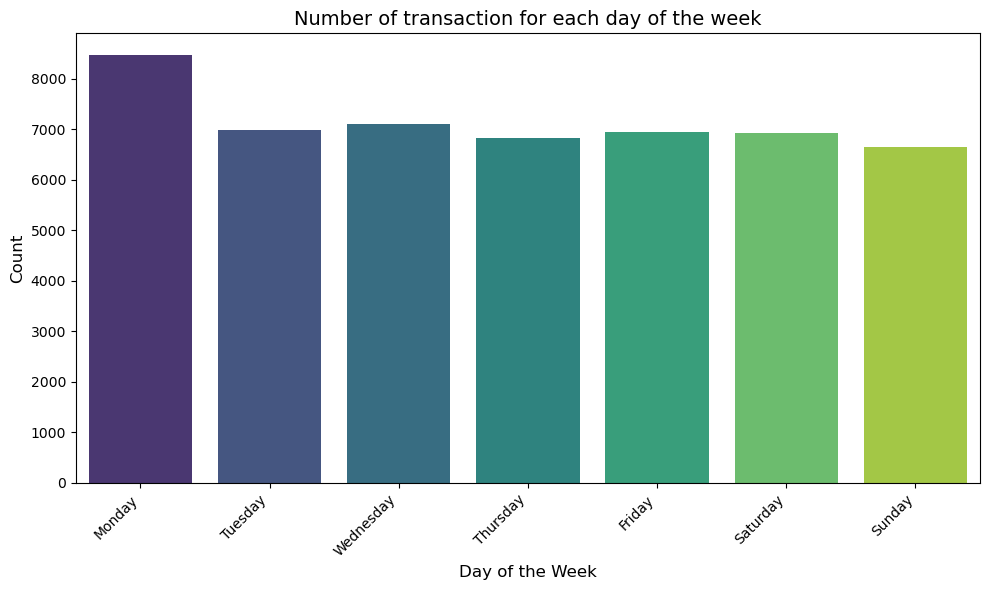

In [15]:
# Calculate the count of rows for each day of the week
day_counts = transactions_df['day_of_week'].value_counts().reset_index()
day_counts.columns = ['Day of the Week', 'Count']

# Sort days of the week in the correct order (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.sort_values(by='Day of the Week', key=lambda x: x.map({day: i for i, day in enumerate(days_order)}))

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_counts, x='Day of the Week', y='Count', palette='viridis')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of transaction for each day of the week', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Checking transactions per hour of the day

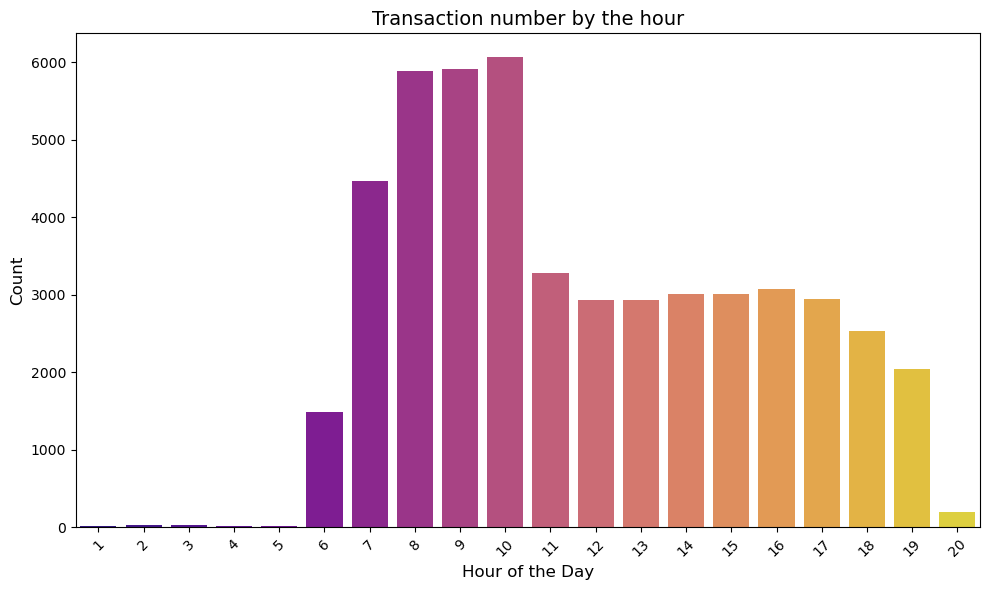

In [16]:
# Calculate the count of rows for each hour
hour_counts = transactions_df['Hours'].value_counts().reset_index()
hour_counts.columns = ['Hours', 'Count']

# Sort hours in chronological order
hour_counts = hour_counts.sort_values(by='Hours')

# Create bar plot for hours
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_counts, x='Hours', y='Count', palette='plasma')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Transaction number by the hour', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

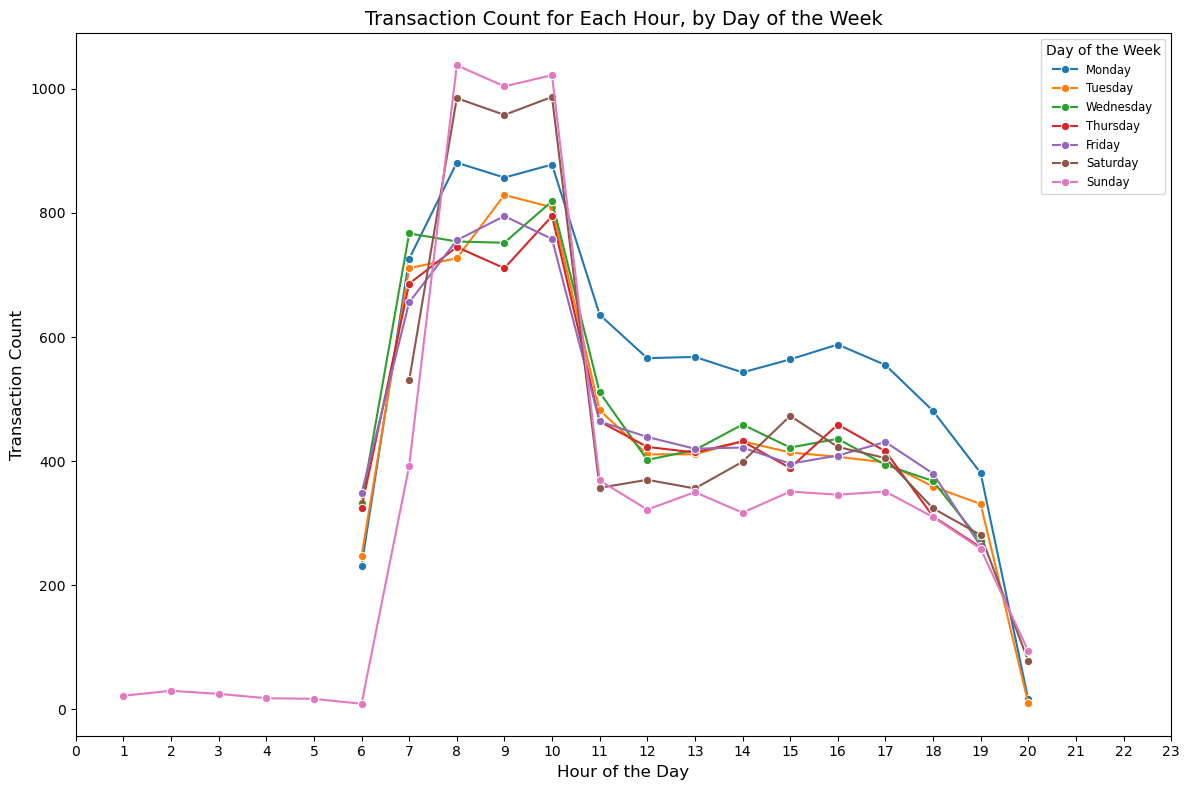

In [17]:

# Calculate counts for each day-hour combination
day_hour_counts = transactions_df.groupby(['day_of_week', 'Hours']).size().reset_index(name='Transaction Count')

# Set the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create line charts for each day of the week
plt.figure(figsize=(12, 8))

for day in days_order:
    day_data = day_hour_counts[day_hour_counts['day_of_week'] == day]
    sns.lineplot(data=day_data, x='Hours', y='Transaction Count', label=day, marker='o')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.title('Transaction Count for Each Hour, by Day of the Week', fontsize=14)
plt.legend(title='Day of the Week', fontsize='small')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

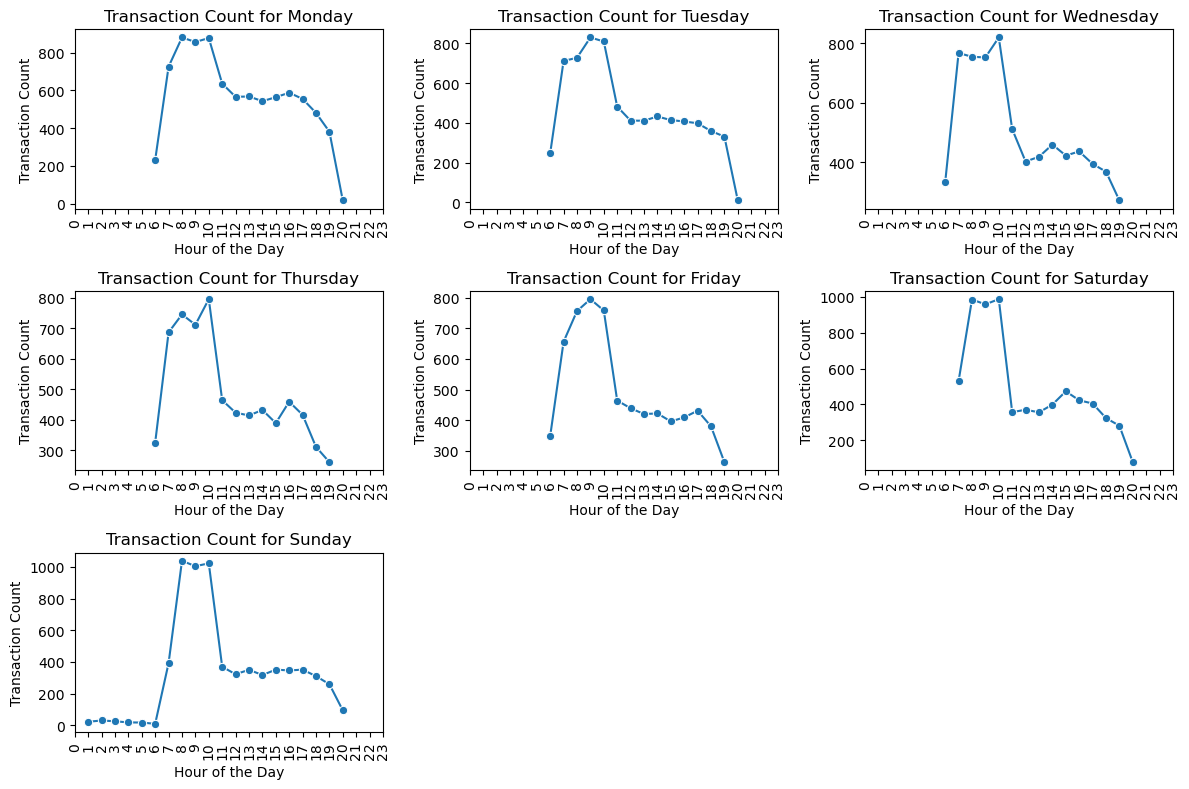

In [18]:
# Calculate counts for each day-hour combination
day_hour_counts = transactions_df.groupby(['day_of_week', 'Hours']).size().reset_index(name='Transaction Count')

# Set the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create individual line charts for each day of the week
plt.figure(figsize=(12, 8))

for i, day in enumerate(days_order, 1):
    plt.subplot(3, 3, i)
    day_data = day_hour_counts[day_hour_counts['day_of_week'] == day]
    sns.lineplot(data=day_data, x='Hours', y='Transaction Count', marker='o')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Transaction Count')
    plt.title(f'Transaction Count for {day}')
    plt.xticks(rotation=90) 
    plt.xticks(range(24))

plt.tight_layout()
plt.show()

### Products

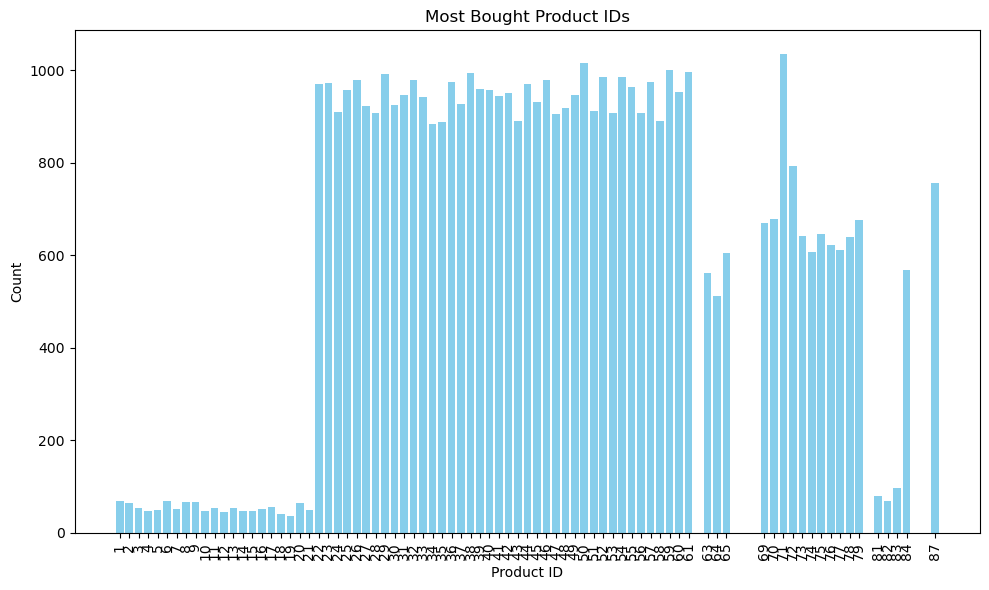

In [19]:
# Calculate counts for each product ID
product_counts = transactions_df['product_id'].value_counts().reset_index()
product_counts.columns = ['Product ID', 'Count']

# Sort product IDs by count in descending order
product_counts = product_counts.sort_values(by='Count', ascending=False)

# Create a bar plot for most bought product IDs
plt.figure(figsize=(10, 6))
plt.bar(product_counts['Product ID'], product_counts['Count'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Most Bought Product IDs')
plt.xticks(product_counts['Product ID'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Most popular product by the hour

In [20]:
# Group by 'Hours' and 'product_id', count occurrences, and reset index
hourly_product_counts = transactions_df.groupby(['Hours', 'product_id']).size().reset_index(name='count')

# Search for three most popular products for each hour
top3_products_by_hour = hourly_product_counts.groupby('Hours').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Display the result
print(top3_products_by_hour)

    Hours  product_id  count
0       1          29      2
1       1          32      2
2       1           9      1
3       2          52      3
4       2          24      2
5       2          26      2
6       3           9      3
7       3          45      3
8       3          31      2
9       4          28      2
10      4          22      1
11      4          23      1
12      5          41      2
13      5          23      1
14      5          34      1
15      6          59     35
16      6          29     34
17      6          58     33
18      7          71    113
19      7          45     95
20      7          61     94
21      8          71    169
22      8          55    129
23      8          38    126
24      9          71    161
25      9          36    131
26      9          42    126
27     10          71    171
28     10          39    134
29     10          33    130
30     11          50     78
31     11          32     76
32     11          38     74
33     12     

### Checking if transaction_id is meaningfull

In [21]:
transaction_counts = transactions_df['transaction_id'].value_counts().reset_index()
transaction_counts.columns = ['Transaction ID', 'Count']

transaction_counts

Transaction ID  Count
0                 97     67
1                 49     66
2                 45     65
3                274     65
4                252     64
...              ...    ...
4198            4123      1
4199            4122      1
4200            4114      1
4201            4097      1
4202            4199      1

[4203 rows x 2 columns]

In [22]:
# plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(data=transaction_counts, x='Transaction ID', y='Count', palette='viridis')

# plt.xlabel('Transaction ID', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.title('Top 10 Transaction IDs by Count', fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### Fixing transaction ID

In [23]:
# # Create a new 'ID' column based on the unique combination of columns
# def generate_id(row):
#     unique_identifier = f"{row['sales_outlet_id']}_{row['instore_yn']}_{row['customer_id']}_{row['transaction_date']}_{row['staff_id']}_{row['Hours']}_{row['Minutes']}"
#     return hash(unique_identifier) % (10 ** 5) 

# transactions_df['ID'] = transactions_df.apply(generate_id, axis=1)

In [24]:
# Create a new 'ID' column based on the unique combination of columns
def generate_id(row):
    unique_identifier = f"{row['sales_outlet_id']}_{row['instore_yn']}_{row['customer_id']}_{row['transaction_date']}_{row['staff_id']}_{row['Hours']}_{row['Minutes']}"
    return (hash(unique_identifier) + 1) % (10 ** 5)

transactions_df['ID'] = transactions_df.apply(generate_id, axis=1)

In [25]:
transactions_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       2019-04-01     12        4       43                3   
1              11       2019-04-01     15       54       39                3   
2              19       2019-04-01     14       34       59                3   
3              32       2019-04-01     16        6        4                3   
4              33       2019-04-01     19       18       37                3   

   staff_id  customer_id  instore_yn  order  ...  line_item_amount  \
0        12          558           0      1  ...              2.50   
1        17          781           0      1  ...              7.00   
2        17          788           1      1  ...              5.00   
3        12          683           0      1  ...              5.00   
4        17           99           1      1  ...              2.45   

   unit_price  promo_item_yn  home_store  customer_since  birthdate  gender  \
0        2.50              0         3.0      2018-06-19 1983-02-25     1.0   
1        3.50              0         3.0      2018-11-02 1991-07-29     2.0   
2        2.50              0         3.0      2018-12-30 1995-02-23     2.0   
3        2.50              0         3.0      2019-03-04 1999-02-06     1.0   
4        2.45              0         3.0      2017-10-01 1967-01-29     0.0   

  birth_year day_of_week     ID  
0     1983.0      Monday  71856  
1     1991.0      Monday   3113  
2     1995.0      Monday   7861  
3     1999.0      Monday  87777  
4     1967.0      Monday  23438  

[5 rows x 23 columns]

In [26]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  int64         
 1   transaction_date  49894 non-null  datetime64[ns]
 2   Hours             49894 non-null  int64         
 3   Minutes           49894 non-null  int64         
 4   Seconds           49894 non-null  int64         
 5   sales_outlet_id   49894 non-null  int64         
 6   staff_id          49894 non-null  int64         
 7   customer_id       49894 non-null  int64         
 8   instore_yn        49894 non-null  int64         
 9   order             49894 non-null  int64         
 10  line_item_id      49894 non-null  int64         
 11  product_id        49894 non-null  int64         
 12  quantity          49894 non-null  int64         
 13  line_item_amount  49894 non-null  float64       
 14  unit_price        4989

#### How many products were bought in one transaction

In [27]:
# Group by 'ID' and count unique product IDs for each 'ID'
product_count_per_id = transactions_df.groupby('ID')['product_id'].nunique().reset_index()
product_count_per_id.columns = ['ID', 'Unique_Product_Count']


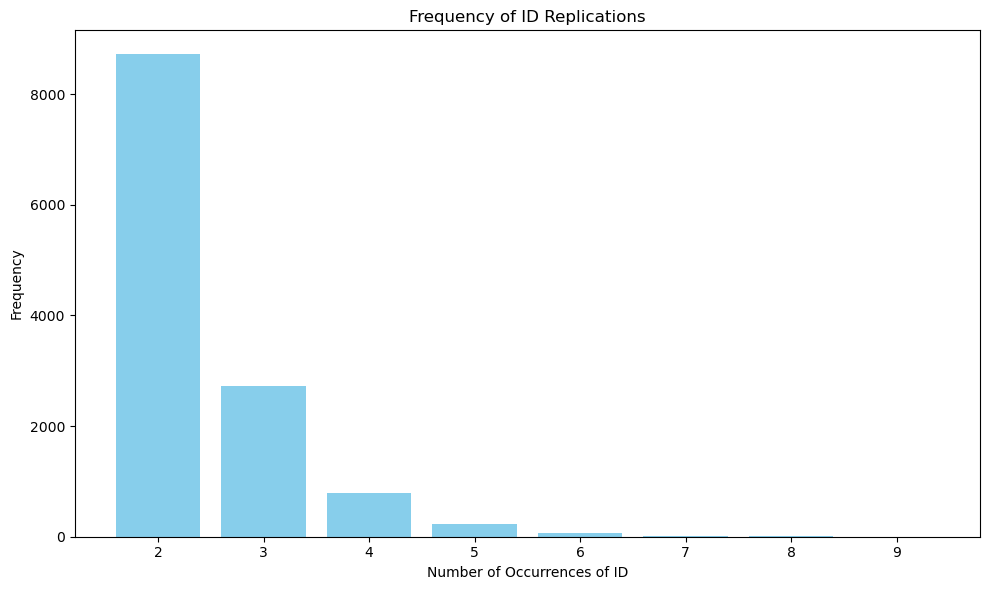

In [28]:
# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts().reset_index()
count_distribution.columns = ['Occurrences', 'Frequency']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 1]

# Create a bar plot to show count distribution of replications
plt.figure(figsize=(10, 6))
plt.bar(replication_counts['Occurrences'], replication_counts['Frequency'], color='skyblue')
plt.xlabel('Number of Occurrences of ID')
plt.ylabel('Frequency')
plt.title('Frequency of ID Replications')
plt.tight_layout()
plt.show()

In [29]:
import plotly.express as px

# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts().reset_index()
count_distribution.columns = ['Occurrences', 'Frequency']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 1]

# Create an interactive bar plot with plotly
fig = px.bar(replication_counts, x='Occurrences', y='Frequency',
             labels={'Occurrences': 'Number of Items bought together', 'Frequency': 'Frequency'},
             title='Frequency of Number of items bought at one transaction',
            # template='plotly_dark'
            )

# Show the plot
fig.show()

In [30]:
# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Filter 'ID's that appear more than 10 times
high_frequency_ids = id_counts[id_counts['Count'] > 10]
print(high_frequency_ids)

Empty DataFrame
Columns: [ID, Count]
Index: []


In [31]:
transactions_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       2019-04-01     12        4       43                3   
1              11       2019-04-01     15       54       39                3   
2              19       2019-04-01     14       34       59                3   
3              32       2019-04-01     16        6        4                3   
4              33       2019-04-01     19       18       37                3   

   staff_id  customer_id  instore_yn  order  ...  line_item_amount  \
0        12          558           0      1  ...              2.50   
1        17          781           0      1  ...              7.00   
2        17          788           1      1  ...              5.00   
3        12          683           0      1  ...              5.00   
4        17           99           1      1  ...              2.45   

   unit_price  promo_item_yn  home_store  customer_since  birthdate  gender  \
0        2.50              0         3.0      2018-06-19 1983-02-25     1.0   
1        3.50              0         3.0      2018-11-02 1991-07-29     2.0   
2        2.50              0         3.0      2018-12-30 1995-02-23     2.0   
3        2.50              0         3.0      2019-03-04 1999-02-06     1.0   
4        2.45              0         3.0      2017-10-01 1967-01-29     0.0   

  birth_year day_of_week     ID  
0     1983.0      Monday  71856  
1     1991.0      Monday   3113  
2     1995.0      Monday   7861  
3     1999.0      Monday  87777  
4     1967.0      Monday  23438  

[5 rows x 23 columns]

In [32]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  int64         
 1   transaction_date  49894 non-null  datetime64[ns]
 2   Hours             49894 non-null  int64         
 3   Minutes           49894 non-null  int64         
 4   Seconds           49894 non-null  int64         
 5   sales_outlet_id   49894 non-null  int64         
 6   staff_id          49894 non-null  int64         
 7   customer_id       49894 non-null  int64         
 8   instore_yn        49894 non-null  int64         
 9   order             49894 non-null  int64         
 10  line_item_id      49894 non-null  int64         
 11  product_id        49894 non-null  int64         
 12  quantity          49894 non-null  int64         
 13  line_item_amount  49894 non-null  float64       
 14  unit_price        4989

# Customer segmentation

In [33]:
from datetime import datetime

# Calculate age
current_year = datetime.now().year
transactions_df['age'] = current_year - transactions_df['birthdate'].dt.year

# Create age groups
bins = [0, 18, 29, 39, 49, 59, 100] 
labels = ['0-18', '19-29', '30-39', '40-49', '50-59','60+']
transactions_df['age_group'] = pd.cut(transactions_df['age'], bins=bins, labels=labels, right=False)

In [34]:
# Group by age group and gender, and count the number of orders in each group
segmented_df = transactions_df.groupby(['age_group', 'gender'])['order'].count().reset_index(name='order_count')

# Display the result
print(segmented_df)

   age_group  gender  order_count
0       0-18     0.0            0
1       0-18     1.0            0
2       0-18     2.0            0
3      19-29     0.0          781
4      19-29     1.0         1246
5      19-29     2.0         1577
6      30-39     0.0         1489
7      30-39     1.0         2215
8      30-39     2.0         2596
9      40-49     0.0         1539
10     40-49     1.0         2037
11     40-49     2.0         1055
12     50-59     0.0         1556
13     50-59     1.0         2151
14     50-59     2.0          210
15       60+     0.0         2857
16       60+     1.0         3202
17       60+     2.0          341


In [35]:
import plotly.express as px
df_items = transactions_df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female', 2: 'Unknown'})

# Group by age group and gender, and sum the quantity of items in each group
items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].sum().reset_index(name='item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(items_by_group, x='item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(items_by_group['age_group'].unique())},
             labels={'item_count': 'Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Item Count by Age Group and Gender')

# Show the plot
fig.show()

In [36]:
df_items = transactions_df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female', 2: 'Unknown'})

# Group by age group and gender, and calculate the average quantity of items in each group
avg_items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].mean().reset_index(name='avg_item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(avg_items_by_group, x='avg_item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(avg_items_by_group['age_group'].unique())},
             labels={'avg_item_count': 'Average Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Average Item Count by Age Group and Gender')

# Show the plot
fig.show()

# 1.1 Customer segmentation in general - to create recomendations for person who doesnt want to specifi gender

In [37]:
all_df = transactions_df[['transaction_date', 'customer_id', 'product_id']]

# Display the transformed DataFrame
print(all_df.head())

  transaction_date  customer_id  product_id
0       2019-04-01          558          52
1       2019-04-01          781          27
2       2019-04-01          788          46
3       2019-04-01          683          23
4       2019-04-01           99          34


In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
# Convert DataFrame to a list of lists (transaction format)
transactions = all_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.02  
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

Frequent Itemsets:
     support itemsets
0   0.032643     (22)
1   0.032031     (23)
2   0.028364     (24)
3   0.032581     (25)
4   0.031603     (26)
5   0.030136     (27)
6   0.028791     (28)
7   0.032826     (29)
8   0.029525     (30)
9   0.029525     (31)
10  0.030748     (32)
11  0.031237     (33)
12  0.029953     (34)
13  0.029831     (35)
14  0.028241     (36)
15  0.029403     (37)
16  0.032520     (38)
17  0.029953     (39)
18  0.030014     (40)
19  0.029647     (41)
20  0.031970     (42)
21  0.029525     (43)
22  0.030870     (44)
23  0.029708     (45)
24  0.032276     (46)
25  0.031420     (47)
26  0.031542     (48)
27  0.031909     (49)
28  0.031909     (50)
29  0.029403     (51)
30  0.032643     (52)
31  0.029953     (53)
32  0.033254     (54)
33  0.031603     (55)
34  0.030442     (56)
35  0.032215     (57)
36  0.028302     (58)
37  0.032031     (59)
38  0.031359     (60)
39  0.032765     (61)
40  0.021945     (69)
41  0.022190     (70)
42  0.029281     (71)
43  0.025674 

In [40]:
# Convert DataFrame to a list of lists (transaction format)
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.02
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the top 3 items often bought together
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(3)

# Display the results
print(f"Top 3 itemsets often bought together are:")
for index, row in top_itemsets.iterrows():
    items = list(row['itemsets'])
    support_percentage = row['support'] * 100
    print(f"Items {items} - {support_percentage:.1f}%")

Top 3 itemsets often bought together are:
Items [54] - 3.3%
Items [29] - 3.3%
Items [61] - 3.3%


In [41]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Display the results in the desired format
result_df = pd.DataFrame(columns=['Product 1', 'Product 2', 'Support'])

# Iterate over frequent itemsets
for _, row in frequent_itemsets.iterrows():
    items = list(row['itemsets'])
    if len(items) == 2:
        result_df = result_df.append({'Product 1': items[0], 'Product 2': items[1], 'Support': row['support']}, ignore_index=True)

# Display the results
print(result_df)

    Product 1  Product 2   Support
0        37.0       63.0  0.003729
1        64.0       37.0  0.003362
2        65.0       37.0  0.003973
3        84.0       37.0  0.003484
4        38.0       63.0  0.004096
5        64.0       38.0  0.003912
6        65.0       38.0  0.004034
7        84.0       38.0  0.003423
8        39.0       63.0  0.003484
9        64.0       39.0  0.003484
10       65.0       39.0  0.003912
11       40.0       63.0  0.003301
12       64.0       40.0  0.003301
13       40.0       65.0  0.004524
14       40.0       84.0  0.004034
15       41.0       63.0  0.003729
16       64.0       41.0  0.003484
17       65.0       41.0  0.003484
18       41.0       84.0  0.003851
19       72.0       87.0  0.007274


In [42]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003 
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan':
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Display the results
    print(f"Products related to {product}:")
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        print(f"{other_product} was bought with {product} {support_percentage:.2f}% times.")
    print()

Products related to 1:

Products related to 2:

Products related to 3:

Products related to 4:

Products related to 5:

Products related to 6:

Products related to 7:

Products related to 8:

Products related to 9:

Products related to 10:

Products related to 11:

Products related to 12:

Products related to 13:

Products related to 14:

Products related to 15:

Products related to 16:

Products related to 17:

Products related to 18:

Products related to 19:

Products related to 20:

Products related to 21:

Products related to 22:

Products related to 23:

Products related to 24:

Products related to 25:

Products related to 26:

Products related to 27:

Products related to 28:

Products related to 29:

Products related to 30:

Products related to 31:

Products related to 32:

Products related to 33:

Products related to 34:

Products related to 35:

Products related to 36:

Products related to 37:
63 was bought with 37 0.37% times.
64 was bought with 37 0.34% times.
65 was bought w

In [43]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA_dict['Product'].append(product)
        MBA_dict['Related Product'].append(other_product)
        MBA_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA_df = pd.DataFrame(MBA_dict)

# Display the new DataFrame
print(MBA_df)

    Product  Related Product  Support Percentage
0        37               63            0.372883
1        37               64            0.336206
2        37               65            0.397335
3        37               84            0.348432
4        38               63            0.409560
5        38               64            0.391222
6        38               65            0.403448
7        38               84            0.342319
8        39               63            0.348432
9        39               64            0.348432
10       39               65            0.391222
11       40               63            0.330094
12       40               64            0.330094
13       40               65            0.452350
14       40               84            0.403448
15       41               63            0.372883
16       41               64            0.348432
17       41               65            0.348432
18       41               84            0.385109
19       63         

In [50]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA2_dict = {'product_id': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA2_dict['product_id'].append(product)
        MBA2_dict['Related Product'].append(other_product)
        MBA2_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA2_df = pd.DataFrame(MBA2_dict)

# Display the new DataFrame
print(MBA2_df)

     product_id  Related Product  Support Percentage
0            22               69            0.226175
1            22               71            0.201724
2            22               72            0.226175
3            22               73            0.232288
4            22               74            0.213950
..          ...              ...                 ...
679          84               39            0.262852
680          84               40            0.403448
681          84               41            0.385109
682          87               70            0.201724
683          87               72            0.727428

[684 rows x 3 columns]


In [67]:
MBA2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          684 non-null    int64  
 1   Related Product     684 non-null    int64  
 2   Support Percentage  684 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 16.2 KB


#### Loading products information data

In [79]:
df3 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\product.csv")
df3.head()

product_id    product_group product_category       product_type  \
0           1  Whole Bean/Teas     Coffee beans      Organic Beans   
1           2  Whole Bean/Teas     Coffee beans  House blend Beans   
2           3  Whole Bean/Teas     Coffee beans     Espresso Beans   
3           4  Whole Bean/Teas     Coffee beans     Espresso Beans   
4           5  Whole Bean/Teas     Coffee beans      Gourmet Beans   

               product_name  \
0       Brazilian - Organic   
1  Our Old Time Diner Blend   
2            Espresso Roast   
3      Primo Espresso Roast   
4    Columbian Medium Roast   

                                 product_description unit_of_measure  \
0     It's like Carnival in a cup. Clean and smooth.           12 oz   
1  Out packed blend of beans that is reminiscent ...           12 oz   
2          Our house blend for a good espresso shot.            1 lb   
3   Our primium single source of hand roasted beans.            1 lb   
4           A smooth cup of coffee any time of day.             1 lb   

   current_wholesale_price current_retail_price  tax_exempt_yn  promo_yn  \
0                    14.40              $18.00               1         0   
1                    14.40              $18.00               1         0   
2                    11.80              $14.75               1         0   
3                    16.36              $20.45               1         0   
4                    12.00              $15.00               1         0   

   new_product_yn  
0               0  
1               0  
2               0  
3               0  
4               0

In [80]:
columns_to_drop = ['product_group','product_type','product_description','unit_of_measure','current_wholesale_price','current_retail_price',
                  'tax_exempt_yn','promo_yn','new_product_yn']

df3 = df3.drop(columns=columns_to_drop)
df3.head()

product_id product_category              product_name
0           1     Coffee beans       Brazilian - Organic
1           2     Coffee beans  Our Old Time Diner Blend
2           3     Coffee beans            Espresso Roast
3           4     Coffee beans      Primo Espresso Roast
4           5     Coffee beans    Columbian Medium Roast

In [82]:

# Function to replace numeric values with corresponding text from df3
def replace_with_text(value):
    product_name = df3.loc[df3['product_id'] == value, 'product_name'].values
    if len(product_name) > 0:
        return product_name[0]
    else:
        return value  # If no match found, keep the original value

# Create a new DataFrame with replaced values
recomendation_df = MBA2_df.copy()
recomendation_df['product_id'] = recomendation_df['product_id'].apply(replace_with_text)
recomendation_df['Related Product'] = recomendation_df['Related Product'].apply(replace_with_text)

recomendation_df.head()

product_id      Related Product  Support Percentage
0  Our Old Time Diner Blend Sm    Hazelnut Biscotti            0.226175
1  Our Old Time Diner Blend Sm  Chocolate Croissant            0.201724
2  Our Old Time Diner Blend Sm         Ginger Scone            0.226175
3  Our Old Time Diner Blend Sm     Almond Croissant            0.232288
4  Our Old Time Diner Blend Sm      Ginger Biscotti            0.213950

# Tinker

### Displaying recomendation data set

In [92]:
from pandastable import Table, TableModel
import pandas as pd
from tkinter import *
from pandastable import Table, TableModel

# Create Tkinter window
root = Tk()
root.title("DataFrame Viewer")

# Create Pandas Table
frame = Frame(root)
frame.pack(fill='both', expand=True)

pt = Table(frame, dataframe=df, showtoolbar=True, showstatusbar=True)
pt.show()

root.mainloop()

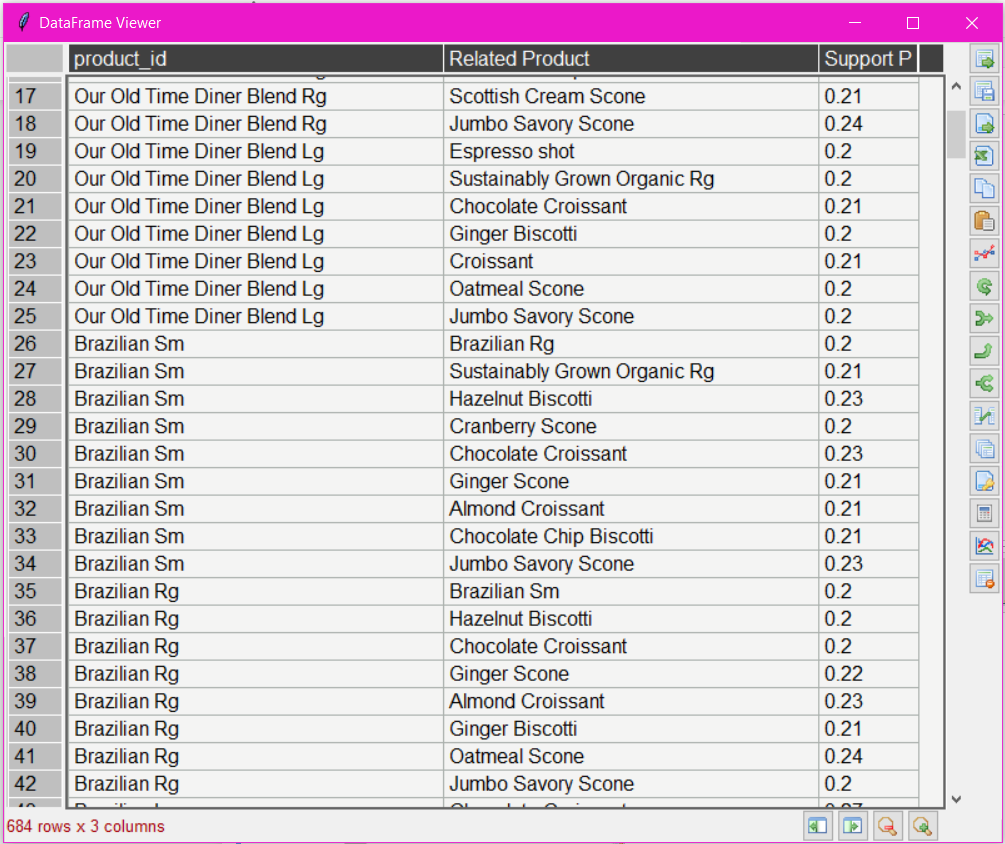

In [97]:
# from IPython.display import display
# from PIL import Image

# image_path = 'C:\\ESTERA\\CCT\\PROJECT\\Pictures\\recomendation table - sample.png'

# # Open the image using Pillow
# img = Image.open(image_path)

# # Display the image
# display(img)

### Tinker with Recomendations

In [1]:
import tkinter as tk
from tkinter import ttk

In [98]:
recomendation_df['product_id'].unique()

array(['Our Old Time Diner Blend Sm', 'Our Old Time Diner Blend Rg',
       'Our Old Time Diner Blend Lg', 'Brazilian Sm', 'Brazilian Rg',
       'Brazilian Lg', 'Columbian Medium Roast Sm',
       'Columbian Medium Roast Rg', 'Columbian Medium Roast Lg',
       'Ethiopia Sm', 'Ethiopia Rg', 'Ethiopia Lg',
       'Jamaican Coffee River Sm', 'Jamaican Coffee River Rg',
       'Jamaican Coffee River Lg', 'Espresso shot', 'Latte', 'Latte Rg',
       'Cappuccino', 'Cappuccino Lg', 'Lemon Grass Rg', 'Lemon Grass Lg',
       'Peppermint Rg', 'Peppermint Lg', 'Serenity Green Tea Rg',
       'Serenity Green Tea Lg', 'English Breakfast Rg',
       'English Breakfast Lg', 'Earl Grey Rg', 'Earl Grey Lg',
       'Traditional Blend Chai Rg', 'Traditional Blend Chai Lg',
       'Morning Sunrise Chai Rg', 'Morning Sunrise Chai Lg',
       'Spicy Eye Opener Chai Rg', 'Spicy Eye Opener Chai Lg',
       'Dark chocolate Rg', 'Dark chocolate Lg',
       'Sustainably Grown Organic Rg', 'Sustainably Grown O

In [99]:
import tkinter as tk
from tkinter import ttk

# Sample array of product names
product_names = ['Our Old Time Diner Blend Sm', 'Our Old Time Diner Blend Rg',
                 'Our Old Time Diner Blend Lg', 'Brazilian Sm', 'Brazilian Rg',
                 'Brazilian Lg', 'Columbian Medium Roast Sm',
                 'Columbian Medium Roast Rg', 'Columbian Medium Roast Lg',
                 'Ethiopia Sm', 'Ethiopia Rg', 'Ethiopia Lg',
                 'Jamaican Coffee River Sm', 'Jamaican Coffee River Rg',
                 'Jamaican Coffee River Lg', 'Espresso shot', 'Latte', 'Latte Rg',
                 'Cappuccino', 'Cappuccino Lg', 'Lemon Grass Rg', 'Lemon Grass Lg',
                 'Peppermint Rg', 'Peppermint Lg', 'Serenity Green Tea Rg',
                 'Serenity Green Tea Lg', 'English Breakfast Rg',
                 'English Breakfast Lg', 'Earl Grey Rg', 'Earl Grey Lg',
                 'Traditional Blend Chai Rg', 'Traditional Blend Chai Lg',
                 'Morning Sunrise Chai Rg', 'Morning Sunrise Chai Lg',
                 'Spicy Eye Opener Chai Rg', 'Spicy Eye Opener Chai Lg',
                 'Dark chocolate Rg', 'Dark chocolate Lg',
                 'Sustainably Grown Organic Rg', 'Sustainably Grown Organic Lg',
                 'Carmel syrup', 'Hazelnut syrup', 'Sugar Free Vanilla syrup',
                 'Hazelnut Biscotti', 'Cranberry Scone', 'Chocolate Croissant',
                 'Ginger Scone', 'Almond Croissant', 'Ginger Biscotti', 'Croissant',
                 'Chocolate Chip Biscotti', 'Oatmeal Scone',
                 'Scottish Cream Scone ', 'Jumbo Savory Scone', 'Chocolate syrup',
                 'Ouro Brasileiro shot']

# Function to handle button click event
def on_button_click():
    selected_product = product_var.get()
    print(f"Selected Product: {selected_product}")

# Create the main window
root = tk.Tk()
root.title("Product Selection")

# Create a dropdown menu with product names
product_var = tk.StringVar()
product_dropdown = ttk.Combobox(root, textvariable=product_var, values=product_names, state='readonly')
product_dropdown.grid(row=0, column=0, padx=10, pady=10)

# Create a button to handle selection
select_button = ttk.Button(root, text="Select", command=on_button_click)
select_button.grid(row=0, column=1, padx=10, pady=10)

# Start the Tkinter event loop
root.mainloop()

Selected Product: Our Old Time Diner Blend Sm


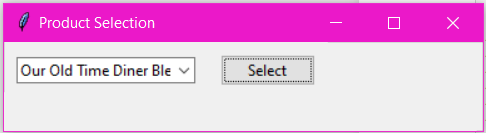

In [100]:
# image_path = 'C:\\ESTERA\\CCT\\PROJECT\\Pictures\\Tinker-general1.png'

# # Open the image using Pillow
# img = Image.open(image_path)

# # Display the image
# display(img)

In [113]:
# Create a copy of the original DataFrame
Tinker_df = recomendation_df.copy()

# Get unique product names
product_names = ['Our Old Time Diner Blend Sm', 'Our Old Time Diner Blend Rg',
                 'Our Old Time Diner Blend Lg', 'Brazilian Sm', 'Brazilian Rg',
                 'Brazilian Lg', 'Columbian Medium Roast Sm',
                 'Columbian Medium Roast Rg', 'Columbian Medium Roast Lg',
                 'Ethiopia Sm', 'Ethiopia Rg', 'Ethiopia Lg',
                 'Jamaican Coffee River Sm', 'Jamaican Coffee River Rg',
                 'Jamaican Coffee River Lg', 'Espresso shot', 'Latte', 'Latte Rg',
                 'Cappuccino', 'Cappuccino Lg', 'Lemon Grass Rg', 'Lemon Grass Lg',
                 'Peppermint Rg', 'Peppermint Lg', 'Serenity Green Tea Rg',
                 'Serenity Green Tea Lg', 'English Breakfast Rg',
                 'English Breakfast Lg', 'Earl Grey Rg', 'Earl Grey Lg',
                 'Traditional Blend Chai Rg', 'Traditional Blend Chai Lg',
                 'Morning Sunrise Chai Rg', 'Morning Sunrise Chai Lg',
                 'Spicy Eye Opener Chai Rg', 'Spicy Eye Opener Chai Lg',
                 'Dark chocolate Rg', 'Dark chocolate Lg',
                 'Sustainably Grown Organic Rg', 'Sustainably Grown Organic Lg',
                 'Carmel syrup', 'Hazelnut syrup', 'Sugar Free Vanilla syrup',
                 'Hazelnut Biscotti', 'Cranberry Scone', 'Chocolate Croissant',
                 'Ginger Scone', 'Almond Croissant', 'Ginger Biscotti', 'Croissant',
                 'Chocolate Chip Biscotti', 'Oatmeal Scone',
                 'Scottish Cream Scone ', 'Jumbo Savory Scone', 'Chocolate syrup',
                 'Ouro Brasileiro shot']

# Function to handle button click event
def on_button_click():
    selected_product = product_var.get()
    related_products = Tinker_df[Tinker_df['product_id'] == selected_product]['Related Product'].tolist()
    related_listbox.delete(0, tk.END)
    for product in related_products:
        related_listbox.insert(tk.END, product)

# Create the main window
root = tk.Tk()
root.title("Product Selection")

# Create a dropdown menu with product names
product_var = tk.StringVar()
product_dropdown = ttk.Combobox(root, textvariable=product_var, values=product_names, state='readonly')
product_dropdown.grid(row=0, column=0, padx=10, pady=10)

# Create a button to handle selection
select_button = ttk.Button(root, text="Select", command=on_button_click)
select_button.grid(row=0, column=1, padx=10, pady=10)

# Create a listbox to display related products
related_listbox = tk.Listbox(root)
related_listbox.grid(row=1, column=0, columnspan=2, padx=10, pady=10)

# Start the Tkinter event loop
root.mainloop()

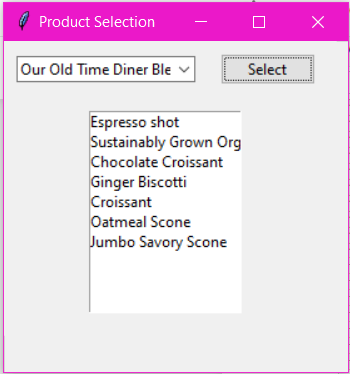

In [114]:
# image_path = 'C:\\ESTERA\\CCT\\PROJECT\\Pictures\\Tinker-general2.png'

# # Open the image using Pillow
# img = Image.open(image_path)

# # Display the image
# display(img)

### Shortfall - offered product may by available (in stock) but it is not on a display, staff would have to be trained or recomendation system should have option for blocking products from showing on upselling screen.

### MBA for all genders - dropping all rows where gender is unknown

In [44]:
gen_df = transactions_df[transactions_df['gender'] != 2][['transaction_date', 'customer_id', 'product_id']]

# Display the result
print(gen_df)

      transaction_date  customer_id  product_id
0           2019-04-01          558          52
3           2019-04-01          683          23
4           2019-04-01           99          34
5           2019-04-01          664          32
6           2019-04-01          316          49
...                ...          ...         ...
49889       2019-04-29            0          30
49890       2019-04-29         8412          25
49891       2019-04-29            0          31
49892       2019-04-29         8030          44
49893       2019-04-29         8030          75

[44115 rows x 3 columns]


In [45]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44115 entries, 0 to 49893
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  44115 non-null  datetime64[ns]
 1   customer_id       44115 non-null  int64         
 2   product_id        44115 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 MB


In [46]:
MBA_gen_df = gen_df

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_gen_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA_gen_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA_gen_dict['Product'].append(product)
        MBA_gen_dict['Related Product'].append(other_product)
        MBA_gen_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA_gen_df = pd.DataFrame(MBA_gen_dict)

# Display the new DataFrame
print(MBA_gen_df)

      Product  Related Product  Support Percentage
0           1               39            0.215448
1          22               23            0.231408
2          22               24            0.231408
3          22               25            0.207469
4          22               26            0.223428
...       ...              ...                 ...
2263       87               73            0.223428
2264       87               74            0.223428
2265       87               76            0.215448
2266       87               77            0.215448
2267       87               79            0.239387

[2268 rows x 3 columns]


#### Other info about genders orders

In [47]:
gender_df = transactions_df[transactions_df['gender'] != 2]
gender_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       2019-04-01     12        4       43                3   
3              32       2019-04-01     16        6        4                3   
4              33       2019-04-01     19       18       37                3   
5              39       2019-04-01     18       54       46                3   
6              50       2019-04-01     13        3       49                3   

   staff_id  customer_id  instore_yn  order  ...  promo_item_yn  home_store  \
0        12          558           0      1  ...              0         3.0   
3        12          683           0      1  ...              0         3.0   
4        17           99           1      1  ...              0         3.0   
5        17          664           1      1  ...              0         3.0   
6        12          316           0      1  ...              0         3.0   

   customer_since  birthdate  gender  birth_year  day_of_week     ID   age  \
0      2018-06-19 1983-02-25     1.0      1983.0       Monday  15951  41.0   
3      2019-03-04 1999-02-06     1.0      1999.0       Monday  40545  25.0   
4      2017-10-01 1967-01-29     0.0      1967.0       Monday  84956  57.0   
5      2019-01-24 1996-09-04     1.0      1996.0       Monday   2049  28.0   
6      2017-02-04 1952-04-11     1.0      1952.0       Monday   4823  72.0   

   age_group  
0      40-49  
3      19-29  
4      50-59  
5      19-29  
6        60+  

[5 rows x 25 columns]

In [48]:
gender_df['gender'].unique()

array([ 1.,  0., nan])

In [49]:
# Drop rows with NaN values
gender_df = gender_df.dropna()

In [50]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19073 entries, 0 to 49893
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19073 non-null  int64         
 1   transaction_date  19073 non-null  datetime64[ns]
 2   Hours             19073 non-null  int64         
 3   Minutes           19073 non-null  int64         
 4   Seconds           19073 non-null  int64         
 5   sales_outlet_id   19073 non-null  int64         
 6   staff_id          19073 non-null  int64         
 7   customer_id       19073 non-null  int64         
 8   instore_yn        19073 non-null  int64         
 9   order             19073 non-null  int64         
 10  line_item_id      19073 non-null  int64         
 11  product_id        19073 non-null  int64         
 12  quantity          19073 non-null  int64         
 13  line_item_amount  19073 non-null  float64       
 14  unit_price        1907

In [51]:
columns_to_drop = ['transaction_id','Hours', 'Seconds','day_of_week', 'sales_outlet_id', 'staff_id', 'home_store', 'birthdate','line_item_id', 'line_item_amount', 'unit_price']

gender_df = gender_df.drop(columns=columns_to_drop)

In [52]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19073 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  19073 non-null  datetime64[ns]
 1   Minutes           19073 non-null  int64         
 2   customer_id       19073 non-null  int64         
 3   instore_yn        19073 non-null  int64         
 4   order             19073 non-null  int64         
 5   product_id        19073 non-null  int64         
 6   quantity          19073 non-null  int64         
 7   promo_item_yn     19073 non-null  int64         
 8   customer_since    19073 non-null  datetime64[ns]
 9   gender            19073 non-null  float64       
 10  birth_year        19073 non-null  float64       
 11  ID                19073 non-null  int64         
 12  age               19073 non-null  float64       
 13  age_group         19073 non-null  category      
dtypes: category(1), dateti

In [53]:
# Converting 'customer_since' column to datetime format in DataFrame
gender_df['customer_since'] = pd.to_datetime(gender_df['customer_since'])

# Calculating age at the time of becoming a customer in the DataFrame
gender_df['age_at_first_purchase'] = gender_df['customer_since'].dt.year - gender_df['birth_year']
gender_df.head()

transaction_date  Minutes  customer_id  instore_yn  order  product_id  \
0       2019-04-01        4          558           0      1          52   
3       2019-04-01        6          683           0      1          23   
4       2019-04-01       18           99           1      1          34   
5       2019-04-01       54          664           1      1          32   
6       2019-04-01        3          316           0      1          49   

   quantity  promo_item_yn customer_since  gender  birth_year     ID   age  \
0         1              0     2018-06-19     1.0      1983.0  15951  41.0   
3         2              0     2019-03-04     1.0      1999.0  40545  25.0   
4         1              0     2017-10-01     0.0      1967.0  84956  57.0   
5         1              0     2019-01-24     1.0      1996.0   2049  28.0   
6         2              0     2017-02-04     1.0      1952.0   4823  72.0   

  age_group  age_at_first_purchase  
0     40-49                   35.0  
3     19-29                   20.0  
4     50-59                   50.0  
5     19-29                   23.0  
6       60+                   65.0

In [54]:
# Binning ages into specified intervals and creating a new column
bins = [0, 19, 29, 39, 49, 59, float('inf')]
labels = ['0-18', '19-29', '30-39', '40-49', '50-59','60+']

gender_df['age_at_first_purchase_group'] = pd.cut(gender_df['age_at_first_purchase'], bins=bins, labels=labels)

# Displaying the updated DataFrame
gender_df.head()

transaction_date  Minutes  customer_id  instore_yn  order  product_id  \
0       2019-04-01        4          558           0      1          52   
3       2019-04-01        6          683           0      1          23   
4       2019-04-01       18           99           1      1          34   
5       2019-04-01       54          664           1      1          32   
6       2019-04-01        3          316           0      1          49   

   quantity  promo_item_yn customer_since  gender  birth_year     ID   age  \
0         1              0     2018-06-19     1.0      1983.0  15951  41.0   
3         2              0     2019-03-04     1.0      1999.0  40545  25.0   
4         1              0     2017-10-01     0.0      1967.0  84956  57.0   
5         1              0     2019-01-24     1.0      1996.0   2049  28.0   
6         2              0     2017-02-04     1.0      1952.0   4823  72.0   

  age_group  age_at_first_purchase age_at_first_purchase_group  
0     40-49                   35.0                       30-39  
3     19-29                   20.0                       19-29  
4     50-59                   50.0                       50-59  
5     19-29                   23.0                       19-29  
6       60+                   65.0                         60+

In [55]:
gender_df.tail()

transaction_date  Minutes  customer_id  instore_yn  order  product_id  \
49882       2019-04-29       16         8026           1      1          41   
49888       2019-04-29       36         8401           0      1          87   
49890       2019-04-29       51         8412           1      1          25   
49892       2019-04-29       45         8030           0      1          44   
49893       2019-04-29       45         8030           0      1          75   

       quantity  promo_item_yn customer_since  gender  birth_year     ID  \
49882         1              0     2018-11-15     0.0      1962.0  28418   
49888         1              1     2019-04-07     0.0      1954.0  88581   
49890         2              0     2019-01-08     0.0      1953.0  44851   
49892         2              0     2018-08-23     1.0      1994.0  24237   
49893         1              0     2018-08-23     1.0      1994.0  24237   

        age age_group  age_at_first_purchase age_at_first_purchase_group  
49882  62.0       60+                   56.0                       50-59  
49888  70.0       60+                   65.0                         60+  
49890  71.0       60+                   66.0                         60+  
49892  30.0     30-39                   24.0                       19-29  
49893  30.0     30-39                   24.0                       19-29

### Checking correlation between current age (group), age whe becoming first customer (goup) and gender

In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Transform 'age_group' and 'age_at_first_purchase_group' columns
new_df = pd.DataFrame()
new_df['gender'] = gender_df['gender']
new_df['age_group_number'] = label_encoder.fit_transform(gender_df['age_group'].astype(str))
new_df['age_at_first_purchase_group_number'] = label_encoder.fit_transform(gender_df['age_at_first_purchase_group'].astype(str))
new_df.head()

gender  age_group_number  age_at_first_purchase_group_number
0     1.0                 2                                   2
3     1.0                 0                                   1
4     0.0                 3                                   4
5     1.0                 0                                   1
6     1.0                 4                                   5

In [57]:
new_df.corr()

gender  age_group_number  \
gender                              1.000000         -0.056868   
age_group_number                   -0.056868          1.000000   
age_at_first_purchase_group_number -0.045944          0.942713   

                                    age_at_first_purchase_group_number  
gender                                                       -0.045944  
age_group_number                                              0.942713  
age_at_first_purchase_group_number                            1.000000

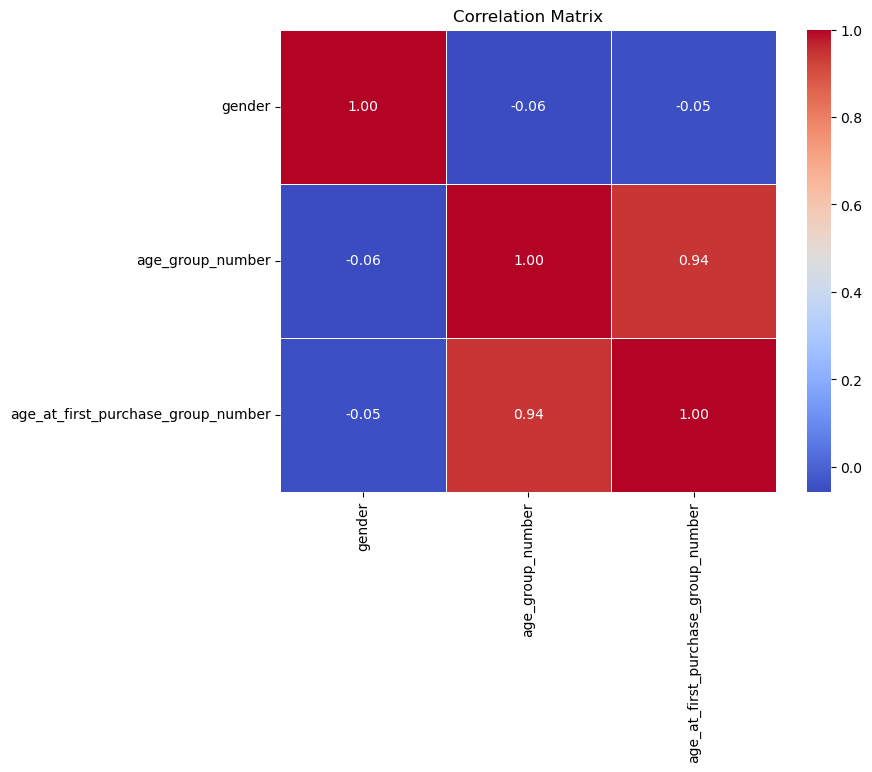

In [58]:
correlation_matrix = new_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

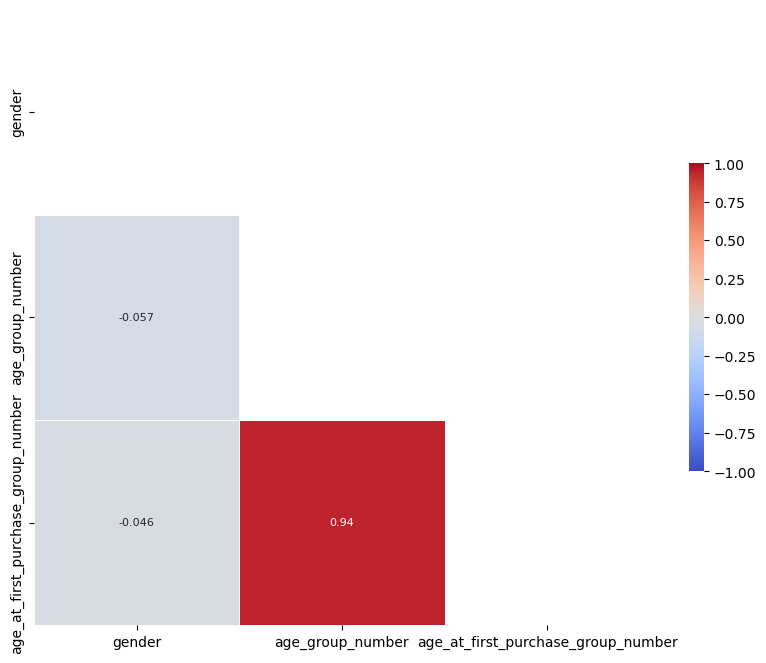

In [59]:
# plot heatmap
corrmat = new_df.corr()
# set mask for upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# set hot-cold colour scheme
cmap = 'coolwarm'

# plot graph
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square = True, mask=mask, cmap=cmap,
            vmax=1, vmin=-1, center=0,
            annot = True, annot_kws = {'size': 8},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

C:\Users\ester\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packagin

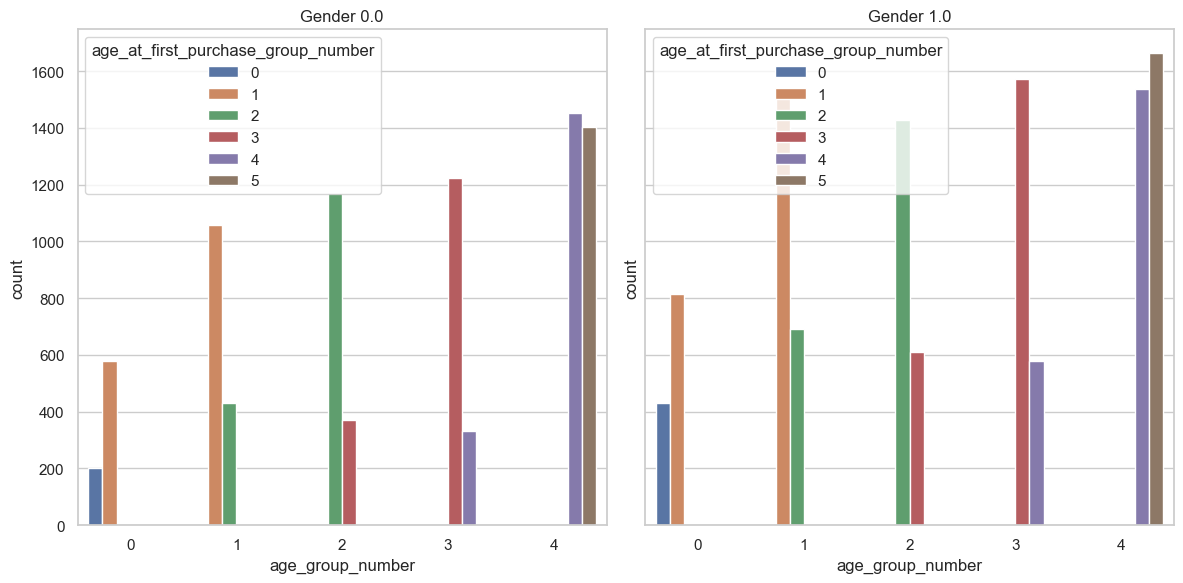

In [60]:
filtered_groups = new_df.dropna(subset=['gender'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot for gender 0.0 - Male
sns.countplot(x='age_group_number', hue='age_at_first_purchase_group_number', data=filtered_groups[filtered_groups['gender'] == 0.0], ax=axes[0])
axes[0].set_title('Gender 0.0')

# Plot for gender 1.0 - Female
sns.countplot(x='age_group_number', hue='age_at_first_purchase_group_number', data=filtered_groups[filtered_groups['gender'] == 1.0], ax=axes[1])
axes[1].set_title('Gender 1.0')

# Layout
plt.tight_layout()

# Show the plots
plt.show()

# Female

In [61]:
# Select rows where 'gender' column equals 1
Female = gender_df[gender_df['gender'] == 1]
Female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10851 entries, 0 to 49893
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   transaction_date             10851 non-null  datetime64[ns]
 1   Minutes                      10851 non-null  int64         
 2   customer_id                  10851 non-null  int64         
 3   instore_yn                   10851 non-null  int64         
 4   order                        10851 non-null  int64         
 5   product_id                   10851 non-null  int64         
 6   quantity                     10851 non-null  int64         
 7   promo_item_yn                10851 non-null  int64         
 8   customer_since               10851 non-null  datetime64[ns]
 9   gender                       10851 non-null  float64       
 10  birth_year                   10851 non-null  float64       
 11  ID                           10851 non-nu

In [62]:
Female.head()

transaction_date  Minutes  customer_id  instore_yn  order  product_id  \
0       2019-04-01        4          558           0      1          52   
3       2019-04-01        6          683           0      1          23   
5       2019-04-01       54          664           1      1          32   
6       2019-04-01        3          316           0      1          49   
8       2019-04-01       30          370           1      1          51   

   quantity  promo_item_yn customer_since  gender  birth_year     ID   age  \
0         1              0     2018-06-19     1.0      1983.0  15951  41.0   
3         2              0     2019-03-04     1.0      1999.0  40545  25.0   
5         1              0     2019-01-24     1.0      1996.0   2049  28.0   
6         2              0     2017-02-04     1.0      1952.0   4823  72.0   
8         2              0     2017-05-26     1.0      1959.0   5908  65.0   

  age_group  age_at_first_purchase age_at_first_purchase_group  
0     40-49                   35.0                       30-39  
3     19-29                   20.0                       19-29  
5     19-29                   23.0                       19-29  
6       60+                   65.0                         60+  
8       60+                   58.0                       50-59

### How old were female customer when first order/signed in

In [63]:
# # Calculate percentage distribution based on 'age_at_first_purchase'
# age_percentage = Female['age_at_first_purchase'].value_counts(normalize=True) * 100

# # Plotting the percentage distribution
# plt.figure(figsize=(10, 6))
# age_percentage.plot(kind='bar', color='skyblue')
# plt.xlabel('Age at First Purchase')
# plt.ylabel('Percentage')
# plt.title('Percentage Distribution of Age at First Purchase')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [64]:
# Calculating counts for each age group
age_group_counts = Female['age_group'].value_counts().reset_index()
age_group_counts.columns = ['age_group', 'count']

# Adding a percentage column and rounding to 2 decimal places
total_count = age_group_counts['count'].sum()
age_group_counts['percentage'] = round((age_group_counts['count'] / total_count) * 100, 2)

# Sorting the DataFrame by age_group column
age_group_counts = age_group_counts.sort_values(by='age_group')

# Displaying the resulting DataFrame
print(age_group_counts)


  age_group  count  percentage
5      0-18      0        0.00
4     19-29   1246       11.48
1     30-39   2215       20.41
3     40-49   2037       18.77
2     50-59   2151       19.82
0       60+   3202       29.51


In [65]:
# Convert interval data to string for visualization
age_group_counts['age_group'] = age_group_counts['age_group'].astype(str)

fig = px.bar(age_group_counts, x='age_group', y='percentage', text='percentage',
             labels={'percentage': 'Percentage'},
             title='Percentage Distribution of Age Groups - Female',
             color='percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(transition_duration=500)

fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Checking how many items per transaction are for each age group

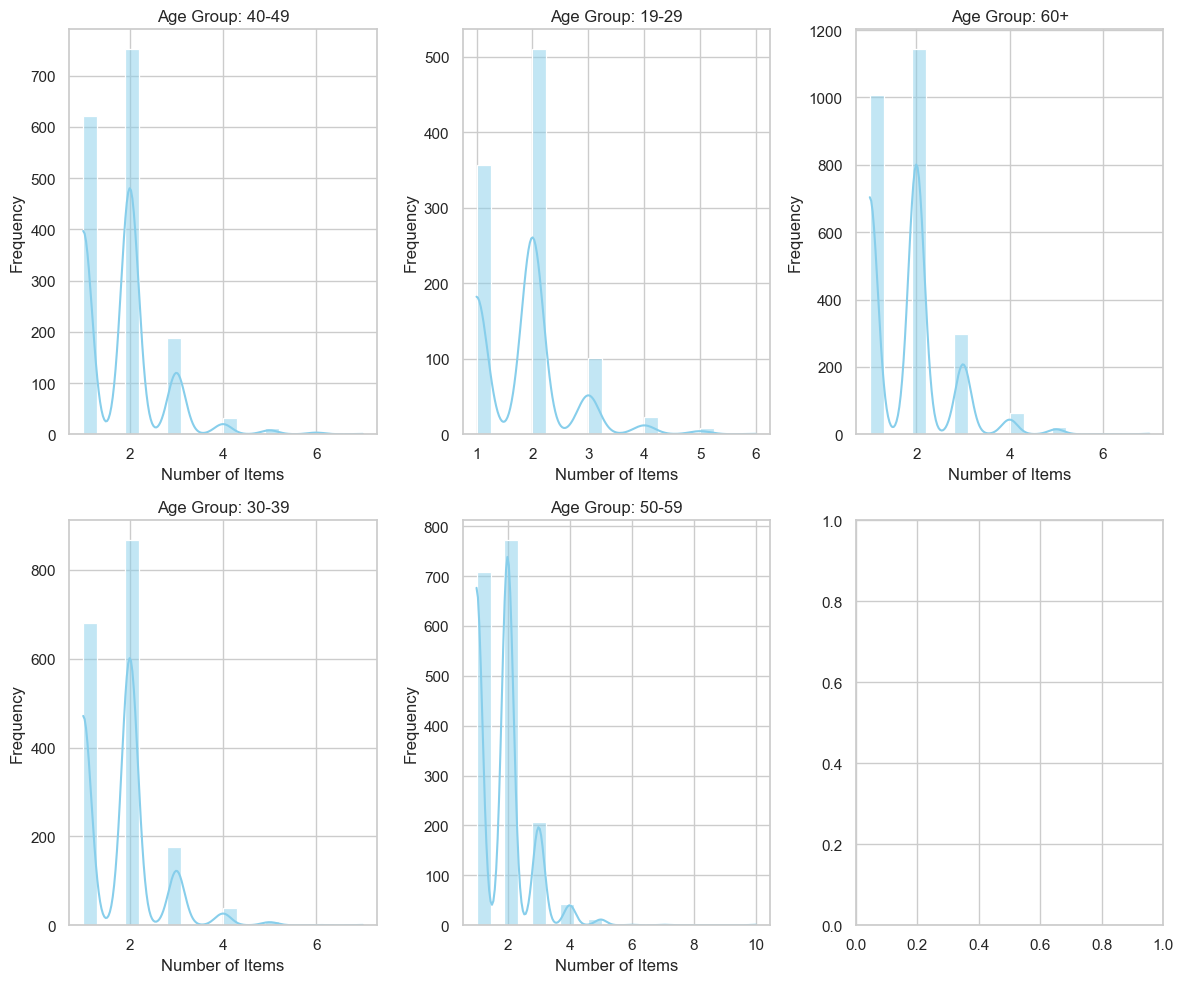

In [66]:
# Set the style of the plots
sns.set_style('whitegrid')

# Get unique age groups
age_groups = Female['age_group'].unique()

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(age_groups) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Calculate subplot position
    row = i // n_cols
    col = i % n_cols
    
    # Plot the histogram 
    sns.histplot(items_per_transaction, bins=20, kde=True, color='skyblue', ax=axes[row, col])
    
    # Set plot title and labels
    axes[row, col].set_title(f'Age Group: {age_group}')
    axes[row, col].set_xlabel('Number of Items')
    axes[row, col].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [67]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique age groups and sort them
age_groups = sorted(Female['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Create histogram for each age group
    hist = go.Histogram(x=items_per_transaction, nbinsx=20, name=f"Age Group: {age_group}")
    
    # Add histogram to the subplot
    fig.add_trace(hist, row=i+1, col=1)

# Update layout and display plot
fig.update_layout(height=800, showlegend=False)
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [68]:
age_groups = sorted(Female['age_group'].unique())

age_group_results = []

for age_group in age_groups:
    age_group_data = Female[Female['age_group'] == age_group]
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    item_counts = items_per_transaction.value_counts(normalize=True).reset_index()
    item_counts.columns = ['items', 'percentage']
    item_counts['age_group'] = age_group
    
    age_group_results.append(item_counts)

# Combine results for all age groups into a single DataFrame
result_df = pd.concat(age_group_results, ignore_index=True)
result_df['percentage'] = (result_df['percentage'] * 100).apply(lambda x: f'{x:.0f}%')

# Show the DataFrame with the results
print(result_df)

    items percentage age_group
0       2        51%     19-29
1       1        36%     19-29
2       3        10%     19-29
3       4         2%     19-29
4       5         1%     19-29
5       6         0%     19-29
6       2        49%     30-39
7       1        38%     30-39
8       3        10%     30-39
9       4         2%     30-39
10      5         1%     30-39
11      7         0%     30-39
12      6         0%     30-39
13      2        47%     40-49
14      1        39%     40-49
15      3        12%     40-49
16      4         2%     40-49
17      5         1%     40-49
18      6         0%     40-49
19      7         0%     40-49
20      2        44%     50-59
21      1        41%     50-59
22      3        12%     50-59
23      4         2%     50-59
24      5         1%     50-59
25      7         0%     50-59
26     10         0%     50-59
27      6         0%     50-59
28      2        45%       60+
29      1        40%       60+
30      3        12%       60+
31      

In [69]:
# Sorting age groups
age_groups = sorted(result_df['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups, 1):
    # Filter the data for the specific age group
    age_group_data = result_df[result_df['age_group'] == age_group]
    
    # Convert percentage to numeric
    age_group_data['percentage'] = age_group_data['percentage'].str.rstrip('%').astype(float)
    
    # Create bar chart for each age group
    bar_chart = go.Bar(x=age_group_data['items'], y=age_group_data['percentage'], name=f"Age Group: {age_group}")
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=i, col=1)
    

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per Transaction Percentage by Age Group")

# Update axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups), col=1)

# Show plot
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Basket analysis for each of age group

In [70]:
Female['age_group'].unique()

['40-49', '19-29', '60+', '30-39', '50-59']
Categories (6, object): ['0-18' < '19-29' < '30-39' < '40-49' < '50-59' < '60+']

In [71]:
Female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10851 entries, 0 to 49893
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   transaction_date             10851 non-null  datetime64[ns]
 1   Minutes                      10851 non-null  int64         
 2   customer_id                  10851 non-null  int64         
 3   instore_yn                   10851 non-null  int64         
 4   order                        10851 non-null  int64         
 5   product_id                   10851 non-null  int64         
 6   quantity                     10851 non-null  int64         
 7   promo_item_yn                10851 non-null  int64         
 8   customer_since               10851 non-null  datetime64[ns]
 9   gender                       10851 non-null  float64       
 10  birth_year                   10851 non-null  float64       
 11  ID                           10851 non-nu

In [72]:
Female_groups = Female.copy()

In [73]:
Female_groups['age_group_number'] = label_encoder.fit_transform(Female_groups['age_group'].astype(str))
Female_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10851 entries, 0 to 49893
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   transaction_date             10851 non-null  datetime64[ns]
 1   Minutes                      10851 non-null  int64         
 2   customer_id                  10851 non-null  int64         
 3   instore_yn                   10851 non-null  int64         
 4   order                        10851 non-null  int64         
 5   product_id                   10851 non-null  int64         
 6   quantity                     10851 non-null  int64         
 7   promo_item_yn                10851 non-null  int64         
 8   customer_since               10851 non-null  datetime64[ns]
 9   gender                       10851 non-null  float64       
 10  birth_year                   10851 non-null  float64       
 11  ID                           10851 non-nu

In [74]:
Female_groups['age_group_number'].unique()

array([2, 0, 4, 1, 3])

In [75]:
Female_groups.head(25)

transaction_date  Minutes  customer_id  instore_yn  order  product_id  \
0        2019-04-01        4          558           0      1          52   
3        2019-04-01        6          683           0      1          23   
5        2019-04-01       54          664           1      1          32   
6        2019-04-01        3          316           0      1          49   
8        2019-04-01       30          370           1      1          51   
11       2019-04-01       40          595           0      1          47   
12       2019-04-01       27          500           0      1          25   
14       2019-04-01       26          599           1      1          48   
25       2019-04-01        7          302           1      1          50   
27       2019-04-01       24          604           1      1          28   
30       2019-04-01        7          470           0      1          55   
32       2019-04-01       54          553           1      1          47   
33       2019-04-01       52          518           1      1          45   
36       2019-04-01       26          437           0      1          37   
37       2019-04-01        3          552           0      1          50   
40       2019-04-01       30          533           1      1          40   
41       2019-04-01        9          521           0      1          28   
42       2019-04-01       48          512           1      1          41   
44       2019-04-01       30          416           1      1          32   
46       2019-04-01       14          642           1      1          61   
50       2019-04-01       27          344           0      1          49   
51       2019-04-01       10          401           0      1          42   
53       2019-04-01       58          517           0      1          43   
54       2019-04-01       49          328           1      1          39   
55       2019-04-01       49          328           1      1          79   

    quantity  promo_item_yn customer_since  gender  birth_year     ID   age  \
0          1              0     2018-06-19     1.0      1983.0  15951  41.0   
3          2              0     2019-03-04     1.0      1999.0  40545  25.0   
5          1              0     2019-01-24     1.0      1996.0   2049  28.0   
6          2              0     2017-02-04     1.0      1952.0   4823  72.0   
8          2              0     2017-05-26     1.0      1959.0   5908  65.0   
11         1              0     2018-09-03     1.0      1987.0    766  37.0   
12         2              0     2018-02-19     1.0      1975.0  11216  49.0   
14         2              0     2018-09-12     1.0      1988.0  87407  36.0   
25         1              0     2017-01-06     1.0      1950.0  95396  74.0   
27         1              0     2018-09-22     1.0      1989.0   8644  35.0   
30         1              0     2017-12-19     1.0      1971.0  25573  53.0   
32         1              0     2018-06-09     1.0      1982.0  88734  42.0   
33         2              0     2018-03-28     1.0      1978.0  51711  46.0   
36         2              0     2017-10-12     1.0      1967.0  37707  57.0   
37         1              0     2018-06-07     1.0      1982.0  73858  42.0   
40         1              0     2018-04-28     1.0      1979.0  63606  45.0   
41         2              0     2018-04-03     1.0      1978.0    315  46.0   
42         1              0     2018-03-16     1.0      1977.0  10179  47.0   
44         2              0     2017-08-29     1.0      1965.0  65835  59.0   
46         2              0     2018-12-10     1.0      1993.0  70206  31.0   
50         1              0     2017-04-02     1.0      1955.0  90373  69.0   
51         2              0     2017-07-29     1.0      1963.0  50896  61.0   
53         1              0     2018-03-26     1.0      1977.0  85558  47.0   
54         1              0     2017-02-28     1.0      1953.0  47563  71.0   
55         1              0     2017-02-28     1.0 

#### 0-18 - group is skipped doue to Ethical consideration


#### 19-29

In [76]:
MBA_Female_19_29 = Female_groups[Female_groups['age_group_number'] == 0]

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_Female_19_29.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
Female_19_29_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        Female_19_29_dict['Product'].append(product)
        Female_19_29_dict['Related Product'].append(other_product)
        Female_19_29_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
Female_19_29 = pd.DataFrame(Female_19_29_dict)

# Display the new DataFrame
print(Female_19_29)

     Product  Related Product  Support Percentage
0         13               69            0.241546
1         22               40            0.241546
2         22               77            0.241546
3         23               32            0.241546
4         23               44            0.362319
..       ...              ...                 ...
191       79               65            0.241546
192       84               40            0.724638
193       84               41            0.241546
194       84               74            0.241546
195       87               72            0.483092

[196 rows x 3 columns]


### 30-39

In [77]:
MBA_Female_30_39 = Female_groups[Female_groups['age_group_number'] == 1]

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_Female_30_39.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
Female_30_39_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        Female_30_39_dict['Product'].append(product)
        Female_30_39_dict['Related Product'].append(other_product)
        Female_30_39_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
Female_30_39 = pd.DataFrame(Female_30_39_dict)

# Display the new DataFrame
print(Female_30_39)

    Product  Related Product  Support Percentage
0         6               51            0.207756
1        22               69            0.277008
2        22               73            0.207756
3        23               45            0.207756
4        24               69            0.207756
..      ...              ...                 ...
89       84               38            0.277008
90       84               39            0.277008
91       84               40            0.346260
92       84               41            0.277008
93       87               72            0.554017

[94 rows x 3 columns]


### 40-49

In [78]:
MBA_Female_40_49 = Female_groups[Female_groups['age_group_number'] == 2]

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_Female_40_49.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
Female_40_49_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        Female_40_49_dict['Product'].append(product)
        Female_40_49_dict['Related Product'].append(other_product)
        Female_40_49_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
Female_40_49 = pd.DataFrame(Female_40_49_dict)

# Display the new DataFrame
print(Female_40_49)

    Product  Related Product  Support Percentage
0        23               70            0.227273
1        23               73            0.227273
2        25               69            0.303030
3        25               79            0.227273
4        29               32            0.227273
..      ...              ...                 ...
89       79               40            0.227273
90       79               46            0.227273
91       84               37            0.378788
92       84               41            0.303030
93       87               72            0.757576

[94 rows x 3 columns]


### 50-59

In [79]:
MBA_Female_50_59 = Female_groups[Female_groups['age_group_number'] == 3]
MBA_Female_50_59.head(20)

transaction_date  Minutes  customer_id  instore_yn  order  product_id  \
12        2019-04-01       27          500           0      1          25   
30        2019-04-01        7          470           0      1          55   
36        2019-04-01       26          437           0      1          37   
61        2019-04-01       12          492           0      1          25   
63        2019-04-01       28          500           1      1          41   
75        2019-04-01       31          481           0      1          26   
92        2019-04-01       13          453           1      1          59   
104       2019-04-01        8          486           1      1          59   
111       2019-04-01       52          474           0      1          22   
129       2019-04-01       39          450           1      1          36   
131       2019-04-01       18          482           0      1          59   
135       2019-04-01       22          425           0      1          22   
153       2019-04-01       21          459           0      1          38   
166       2019-04-01       10          488           0      1          42   
171       2019-04-01        9          473           0      1          26   
177       2019-04-01       21          466           0      1          51   
178       2019-04-01       21          466           0      1          74   
180       2019-04-01       14          456           1      1          52   
185       2019-04-01        9          438           1      1          35   
205       2019-04-01       18          424           0      1          61   

     quantity  promo_item_yn customer_since  gender  birth_year     ID   age  \
12          2              0     2018-02-19     1.0      1975.0  11216  49.0   
30          1              0     2017-12-19     1.0      1971.0  25573  53.0   
36          2              0     2017-10-12     1.0      1967.0  37707  57.0   
61          2              0     2018-02-02     1.0      1974.0  31045  50.0   
63          1              0     2018-02-19     1.0      1975.0  33523  49.0   
75          2              0     2018-01-11     1.0      1973.0   2467  51.0   
92          1              0     2017-11-14     1.0      1969.0  18551  55.0   
104         1              0     2018-01-21     1.0      1973.0  88152  51.0   
111         1              0     2017-12-27     1.0      1972.0  33251  52.0   
129         1              0     2017-11-08     1.0      1969.0  60758  55.0   
131         1              0     2018-01-13     1.0      1973.0  25226  51.0   
135         1              0     2017-09-17     1.0      1966.0   7930  58.0   
153         2              0     2017-11-26     1.0      1970.0  25105  54.0   
166         1              0     2018-01-25     1.0      1974.0  98609  50.0   
171         1              0     2017-12-25     1.0      1972.0  29935  52.0   
177         1              0     2017-12-11     1.0      1971.0  22130  53.0   
178         1              0     2017-12-11     1.0      1971.0  22130  53.0   
180         1              0     2017-11-20     1.0      1970.0  91210  54.0   
185         1              0     2017-10-14     1.0      1967.0  64596  57.0   
205         1              0     2017-09-15     1.0      1966.0  36852  58.0   

    age_group  age_at_first_purchase age_at_first_purchase_group  \
12      50-59                   43.0                       40-49   
30      50-59                   46.0                       40-49   
36      50-59                   50.0                       50-59   
61      50-59                   44.0                       40-49   
63      50-59                   43.0                       40-49   
75      50-59                   45.0                       40-49   
92      50-59                   48.0                       40-49   
104     50-59                   45.0                       40-49   
111     50-59                   45.0                       40-49   
129     50-59            

In [80]:
# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_Female_50_59.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
Female_50_59_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        Female_50_59_dict['Product'].append(product)
        Female_50_59_dict['Related Product'].append(other_product)
        Female_50_59_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
Female_50_59 = pd.DataFrame(Female_50_59_dict)

# Display the new DataFrame
print(Female_50_59)

    Product  Related Product  Support Percentage
0        22               73            0.211119
1        23               76            0.211119
2        24               52            0.211119
3        26               72            0.211119
4        27               71            0.281492
..      ...              ...                 ...
91       84               27            0.211119
92       84               37            0.281492
93       84               39            0.211119
94       84               41            0.281492
95       87               72            0.633357

[96 rows x 3 columns]


In [81]:
MBA_Female_50_59 = Female_groups[Female_groups['age_group_number'] == 3]

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_Female_50_59.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
Female_50_59_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        Female_50_59_dict['Product'].append(product)
        Female_50_59_dict['Related Product'].append(other_product)
        Female_50_59_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
Female_50_59 = pd.DataFrame(Female_50_59_dict)

# Display the new DataFrame
print(Female_50_59)

    Product  Related Product  Support Percentage
0        37               63            0.351865
1        38               64            0.562984
2        40               64            0.492611
3        40               65            0.351865
4        41               63            0.351865
5        63               37            0.351865
6        63               41            0.351865
7        64               38            0.562984
8        64               40            0.492611
9        65               40            0.351865
10       72               87            0.633357
11       87               72            0.633357


In [82]:
Female_50_59.head(20)

Product  Related Product  Support Percentage
0        37               63            0.351865
1        38               64            0.562984
2        40               64            0.492611
3        40               65            0.351865
4        41               63            0.351865
5        63               37            0.351865
6        63               41            0.351865
7        64               38            0.562984
8        64               40            0.492611
9        65               40            0.351865
10       72               87            0.633357
11       87               72            0.633357

### 60+

In [83]:
MBA_Female_60 = Female_groups[Female_groups['age_group_number'] == 4]

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_Female_60.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
Female_60_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        Female_60_dict['Product'].append(product)
        Female_60_dict['Related Product'].append(other_product)
        Female_60_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
Female_60 = pd.DataFrame(Female_60_dict)

# Display the new DataFrame
print(Female_60)

    Product  Related Product  Support Percentage
0        27               71            0.286807
1        35               71            0.239006
2        36               76            0.239006
3        37               64            0.239006
4        37               65            0.239006
5        38               64            0.382409
6        38               65            0.334608
7        39               46            0.239006
8        39               63            0.286807
9        39               64            0.382409
10       40               63            0.239006
11       40               64            0.478011
12       40               65            0.334608
13       40               84            0.334608
14       41               63            0.382409
15       44               71            0.239006
16       46               39            0.239006
17       51               71            0.239006
18       59               70            0.239006
19       59         

### Testing loop

In [84]:
all_age_group_dfs = []

# Available age group numbers: 0, 1, 2, 3, 4
for age_group_number in range(5):
    # Filter data for the current age group
    MBA_Female_age_group = Female_groups[Female_groups['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Female_age_group.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

    # Encode transactions for Eclat
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Eclat algorithm to find frequent itemsets
    min_support = 0.002
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Create a dictionary to store results for the current age group
    age_group_dict = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': []}

    # Iterate over each product in df_encoded
    for product in df_encoded.columns:
        if product == 'nan': 
            continue
        
        # Find relevant products for the current product
        relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

        # Store the results in the dictionary
        for _, row in relevant_products.iterrows():
            other_product = list(row['itemsets'] - {product})[0]
            support_percentage = row['support'] * 100
            age_group_dict['Age_Group_Number'].append(age_group_number)
            age_group_dict['Product'].append(product)
            age_group_dict['Related Product'].append(other_product)
            age_group_dict['Support Percentage'].append(support_percentage)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df = pd.DataFrame(age_group_dict)

    # Append the DataFrame to the list
    all_age_group_dfs.append(age_group_df)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results = pd.concat(all_age_group_dfs, ignore_index=True)

# Display the consolidated results
print(all_age_group_results)

     Age_Group_Number  Product  Related Product  Support Percentage
0                   0       13               69            0.241546
1                   0       22               40            0.241546
2                   0       22               77            0.241546
3                   0       23               32            0.241546
4                   0       23               44            0.362319
..                ...      ...              ...                 ...
513                 4       71               44            0.239006
514                 4       71               51            0.239006
515                 4       76               36            0.239006
516                 4       76               59            0.239006
517                 4       84               40            0.334608

[518 rows x 4 columns]


In [85]:
all_age_group_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_Group_Number    518 non-null    int64  
 1   Product             518 non-null    int64  
 2   Related Product     518 non-null    int64  
 3   Support Percentage  518 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 16.3 KB


# Male

In [86]:
# Select rows where 'gender' column equals 0
Male = gender_df[gender_df['gender'] == 0]
Male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8222 entries, 4 to 49890
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   transaction_date             8222 non-null   datetime64[ns]
 1   Minutes                      8222 non-null   int64         
 2   customer_id                  8222 non-null   int64         
 3   instore_yn                   8222 non-null   int64         
 4   order                        8222 non-null   int64         
 5   product_id                   8222 non-null   int64         
 6   quantity                     8222 non-null   int64         
 7   promo_item_yn                8222 non-null   int64         
 8   customer_since               8222 non-null   datetime64[ns]
 9   gender                       8222 non-null   float64       
 10  birth_year                   8222 non-null   float64       
 11  ID                           8222 non-null

In [87]:
# Calculating counts for each age group
age_group_counts_M = Male['age_group'].value_counts().reset_index()
age_group_counts_M.columns = ['age_group', 'count']

# Adding a percentage column and rounding to 2 decimal places
total_count = age_group_counts_M['count'].sum()
age_group_counts_M['percentage'] = round((age_group_counts_M['count'] / total_count) * 100, 2)

# Sorting the DataFrame by age_group column
age_group_counts_M = age_group_counts_M.sort_values(by='age_group')

# Displaying the resulting DataFrame
print(age_group_counts_M)

  age_group  count  percentage
5      0-18      0        0.00
4     19-29    781        9.50
3     30-39   1489       18.11
2     40-49   1539       18.72
1     50-59   1556       18.92
0       60+   2857       34.75


In [88]:

# Convert interval data to string for visualization
age_group_counts_M['age_group'] = age_group_counts_M['age_group'].astype(str)

fig = px.bar(age_group_counts_M, x='age_group', y='percentage', text='percentage',
             labels={'percentage': 'Percentage'},
             title='Percentage Distribution of Age Groups - Male',
             color='percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(transition_duration=500)

fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### How many items are per transaction for each age group - Male

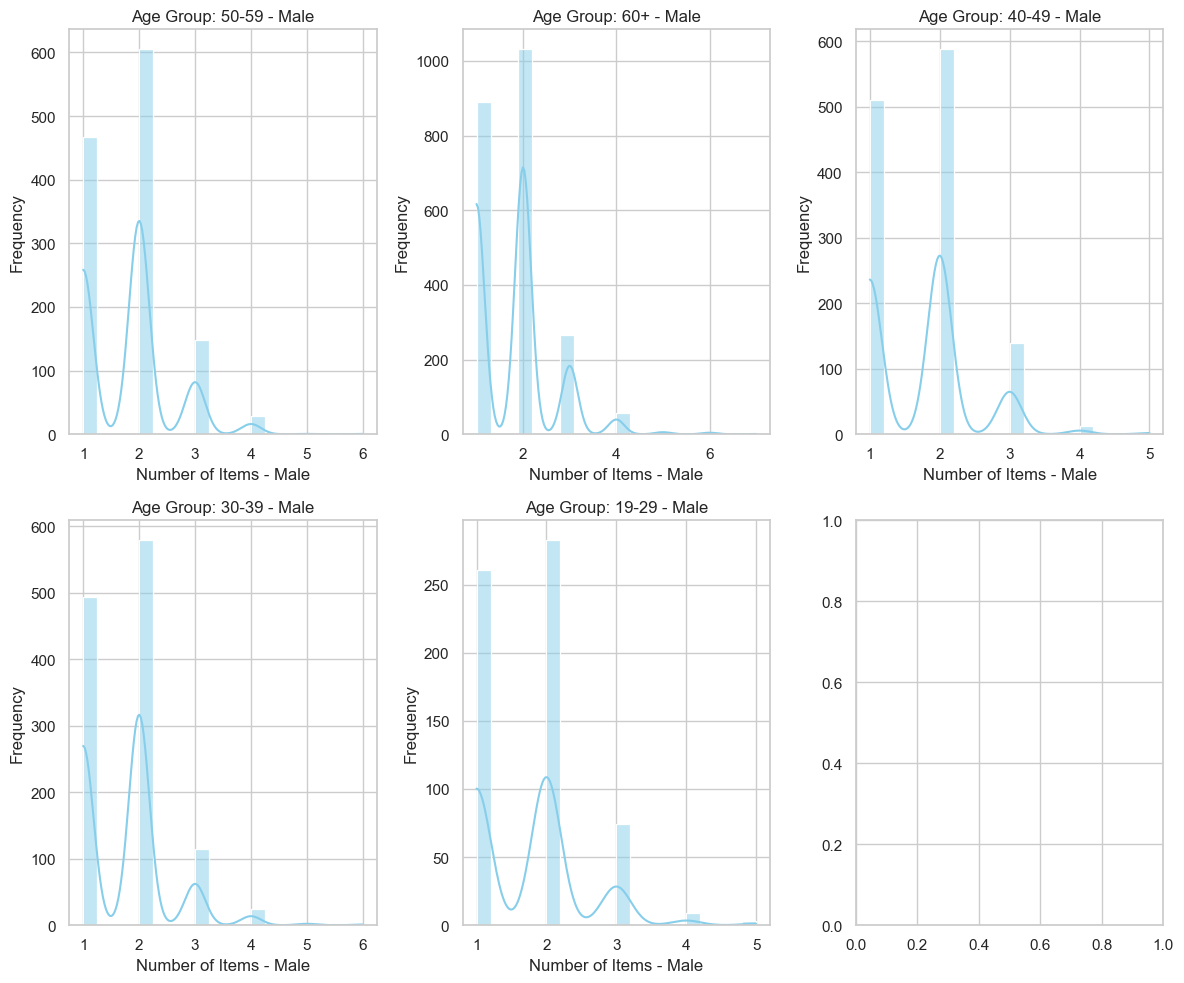

In [89]:
# Set the style of the plots
sns.set_style('whitegrid')

# Get unique age groups
age_groups = Male['age_group'].unique()

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(age_groups) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data_M = Male[Male['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction_M = age_group_data_M.groupby('ID')['quantity'].sum()
    
    # Calculate subplot position
    row = i // n_cols
    col = i % n_cols
    
    # Plot the histogram 
    sns.histplot(items_per_transaction_M, bins=20, kde=True, color='skyblue', ax=axes[row, col])
    
    # Set plot title and labels
    axes[row, col].set_title(f'Age Group: {age_group} - Male')
    axes[row, col].set_xlabel('Number of Items - Male')
    axes[row, col].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [90]:
age_groups_M = sorted(Male['age_group'].unique())

age_group_results_M = []

for age_group_M in age_groups_M:
    age_group_data_M = Male[Male['age_group'] == age_group_M]
    items_per_transaction_M = age_group_data_M.groupby('ID')['quantity'].sum()
    
    item_counts_M = items_per_transaction_M.value_counts(normalize=True).reset_index()
    item_counts_M.columns = ['items', 'percentage']
    item_counts_M['age_group'] = age_group_M
    
    age_group_results_M.append(item_counts_M)

# Combine results for all age groups into a single DataFrame
result_df_M = pd.concat(age_group_results_M, ignore_index=True)
result_df_M['percentage'] = (result_df_M['percentage'] * 100).apply(lambda x: f'{x:.0f}%')

# Show the DataFrame with the results
print(result_df_M)

    items percentage age_group
0       2        45%     19-29
1       1        41%     19-29
2       3        12%     19-29
3       4         1%     19-29
4       5         0%     19-29
5       2        48%     30-39
6       1        41%     30-39
7       3         9%     30-39
8       4         2%     30-39
9       5         0%     30-39
10      6         0%     30-39
11      2        47%     40-49
12      1        41%     40-49
13      3        11%     40-49
14      4         1%     40-49
15      5         0%     40-49
16      2        48%     50-59
17      1        37%     50-59
18      3        12%     50-59
19      4         2%     50-59
20      5         0%     50-59
21      6         0%     50-59
22      2        46%       60+
23      1        39%       60+
24      3        12%       60+
25      4         3%       60+
26      5         0%       60+
27      6         0%       60+
28      7         0%       60+


In [91]:
# Sorting age groups
age_group_M = sorted(result_df_M['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups_M), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group_M in enumerate(age_groups_M, 1):
    # Filter the data for the specific age group
    age_group_data_M = result_df_M[result_df_M['age_group'] == age_group_M]
    
    # Convert percentage to numeric
    age_group_data_M['percentage'] = age_group_data_M['percentage'].str.rstrip('%').astype(float)
    
    # Create bar chart for each age group
    bar_chart = go.Bar(x=age_group_data_M['items'], y=age_group_data_M['percentage'], name=f"Age Group: {age_group}")
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=i, col=1)
    

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per Transaction Percentage by Age Group - Male")

# Update axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups_M), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups_M), col=1)

# Show plot
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [92]:
Male_groups = Male.copy()
Male_groups['age_group_number'] = label_encoder.fit_transform(Male_groups['age_group'].astype(str))
Male_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8222 entries, 4 to 49890
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   transaction_date             8222 non-null   datetime64[ns]
 1   Minutes                      8222 non-null   int64         
 2   customer_id                  8222 non-null   int64         
 3   instore_yn                   8222 non-null   int64         
 4   order                        8222 non-null   int64         
 5   product_id                   8222 non-null   int64         
 6   quantity                     8222 non-null   int64         
 7   promo_item_yn                8222 non-null   int64         
 8   customer_since               8222 non-null   datetime64[ns]
 9   gender                       8222 non-null   float64       
 10  birth_year                   8222 non-null   float64       
 11  ID                           8222 non-null

In [93]:
Male_groups['age_group_number'].unique()

array([3, 4, 2, 1, 0])

### Loop for MBA for all age groups - Male

In [94]:
all_age_group_dfs_M = []

# Available age group numbers: 0, 1, 2, 3, 4
for age_group_number in range(5):
    # Filter data for the current age group
    MBA_Male_age_group = Male_groups[Male_groups['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Male_age_group.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

    # Encode transactions for Eclat
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Eclat algorithm to find frequent itemsets
    min_support = 0.002
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Create a dictionary to store results for the current age group
    age_group_dict_M = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': []}

    # Iterate over each product in df_encoded
    for product in df_encoded.columns:
        if product == 'nan': 
            continue
        
        # Find relevant products for the current product
        relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

        # Store the results in the dictionary
        for _, row in relevant_products.iterrows():
            other_product = list(row['itemsets'] - {product})[0]
            support_percentage = row['support'] * 100
            age_group_dict_M['Age_Group_Number'].append(age_group_number)
            age_group_dict_M['Product'].append(product)
            age_group_dict_M['Related Product'].append(other_product)
            age_group_dict_M['Support Percentage'].append(support_percentage)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df_M = pd.DataFrame(age_group_dict_M)

    # Append the DataFrame to the list
    all_age_group_dfs_M.append(age_group_df_M)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results_M = pd.concat(all_age_group_dfs_M, ignore_index=True)

# Display the consolidated results
print(all_age_group_results_M)

     Age_Group_Number  Product  Related Product  Support Percentage
0                   0       12               79            0.374532
1                   0       22               56            0.374532
2                   0       23               78            0.561798
3                   0       27               29            0.374532
4                   0       29               27            0.374532
..                ...      ...              ...                 ...
469                 4       84               38            0.326264
470                 4       84               40            0.271887
471                 4       84               41            0.217510
472                 4       84               75            0.217510
473                 4       87               72            1.033170

[474 rows x 4 columns]


In [95]:
# Filter the DataFrame based on the conditions
testing_results = all_age_group_results_M[(all_age_group_results_M['Age_Group_Number'] == 2) & (all_age_group_results_M['Product'] == 44)]

# Display the filtered results
print(testing_results)

Empty DataFrame
Columns: [Age_Group_Number, Product, Related Product, Support Percentage]
Index: []


# Checking relation between product and its features

In [96]:
transactions_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       2019-04-01     12        4       43                3   
1              11       2019-04-01     15       54       39                3   
2              19       2019-04-01     14       34       59                3   
3              32       2019-04-01     16        6        4                3   
4              33       2019-04-01     19       18       37                3   

   staff_id  customer_id  instore_yn  order  ...  promo_item_yn  home_store  \
0        12          558           0      1  ...              0         3.0   
1        17          781           0      1  ...              0         3.0   
2        17          788           1      1  ...              0         3.0   
3        12          683           0      1  ...              0         3.0   
4        17           99           1      1  ...              0         3.0   

   customer_since  birthdate  gender  birth_year  day_of_week     ID   age  \
0      2018-06-19 1983-02-25     1.0      1983.0       Monday  15951  41.0   
1      2018-11-02 1991-07-29     2.0      1991.0       Monday  22047  33.0   
2      2018-12-30 1995-02-23     2.0      1995.0       Monday  82519  29.0   
3      2019-03-04 1999-02-06     1.0      1999.0       Monday  40545  25.0   
4      2017-10-01 1967-01-29     0.0      1967.0       Monday  84956  57.0   

   age_group  
0      40-49  
1      30-39  
2      30-39  
3      19-29  
4      50-59  

[5 rows x 25 columns]

In [97]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  int64         
 1   transaction_date  49894 non-null  datetime64[ns]
 2   Hours             49894 non-null  int64         
 3   Minutes           49894 non-null  int64         
 4   Seconds           49894 non-null  int64         
 5   sales_outlet_id   49894 non-null  int64         
 6   staff_id          49894 non-null  int64         
 7   customer_id       49894 non-null  int64         
 8   instore_yn        49894 non-null  int64         
 9   order             49894 non-null  int64         
 10  line_item_id      49894 non-null  int64         
 11  product_id        49894 non-null  int64         
 12  quantity          49894 non-null  int64         
 13  line_item_amount  49894 non-null  float64       
 14  unit_price        4989

In [98]:
# Create a new DataFrame with product settings
product_df = transactions_df.copy()

In [99]:
product_df['transaction_date'] = pd.to_datetime(product_df['transaction_date'])
product_df['age_group_number'] = label_encoder.fit_transform(product_df['age_group'].astype(str))

# Extract the day of the week and create a new column 'day_of_week'
product_df['day_of_week'] = product_df['transaction_date'].dt.day_name()
product_df['day_of_week'] = label_encoder.fit_transform(product_df['day_of_week'].astype(str))

# Display the DataFrame with the 'day_of_week' column
product_df.head()

transaction_id transaction_date  Hours  Minutes  Seconds  sales_outlet_id  \
0               7       2019-04-01     12        4       43                3   
1              11       2019-04-01     15       54       39                3   
2              19       2019-04-01     14       34       59                3   
3              32       2019-04-01     16        6        4                3   
4              33       2019-04-01     19       18       37                3   

   staff_id  customer_id  instore_yn  order  ...  home_store  customer_since  \
0        12          558           0      1  ...         3.0      2018-06-19   
1        17          781           0      1  ...         3.0      2018-11-02   
2        17          788           1      1  ...         3.0      2018-12-30   
3        12          683           0      1  ...         3.0      2019-03-04   
4        17           99           1      1  ...         3.0      2017-10-01   

   birthdate  gender  birth_year  day_of_week     ID   age age_group  \
0 1983-02-25     1.0      1983.0            1  15951  41.0     40-49   
1 1991-07-29     2.0      1991.0            1  22047  33.0     30-39   
2 1995-02-23     2.0      1995.0            1  82519  29.0     30-39   
3 1999-02-06     1.0      1999.0            1  40545  25.0     19-29   
4 1967-01-29     0.0      1967.0            1  84956  57.0     50-59   

   age_group_number  
0                 2  
1                 1  
2                 1  
3                 0  
4                 3  

[5 rows x 26 columns]

In [100]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  int64         
 1   transaction_date  49894 non-null  datetime64[ns]
 2   Hours             49894 non-null  int64         
 3   Minutes           49894 non-null  int64         
 4   Seconds           49894 non-null  int64         
 5   sales_outlet_id   49894 non-null  int64         
 6   staff_id          49894 non-null  int64         
 7   customer_id       49894 non-null  int64         
 8   instore_yn        49894 non-null  int64         
 9   order             49894 non-null  int64         
 10  line_item_id      49894 non-null  int64         
 11  product_id        49894 non-null  int64         
 12  quantity          49894 non-null  int64         
 13  line_item_amount  49894 non-null  float64       
 14  unit_price        4989

In [101]:
# product_forecast_df = product_df.copy().drop(columns=['transaction_id','Minutes','Seconds','order',
#                                             'line_item_id','line_item_amount','birthdate','birth_year',
#                                             'customer_id','age','customer_since','age_group'])
# product_forecast_df.head()

In [102]:
product_df.dropna()

transaction_id transaction_date  Hours  Minutes  Seconds  \
0                   7       2019-04-01     12        4       43   
1                  11       2019-04-01     15       54       39   
2                  19       2019-04-01     14       34       59   
3                  32       2019-04-01     16        6        4   
4                  33       2019-04-01     19       18       37   
...               ...              ...    ...      ...      ...   
49882             740       2019-04-29      8       16       20   
49888             752       2019-04-29     16       36       24   
49890             756       2019-04-29     16       51       14   
49892             763       2019-04-29     15       45       52   
49893             763       2019-04-29     15       45       52   

       sales_outlet_id  staff_id  customer_id  instore_yn  order  ...  \
0                    3        12          558           0      1  ...   
1                    3        17          781           0      1  ...   
2                    3        17          788           1      1  ...   
3                    3        12          683           0      1  ...   
4                    3        17           99           1      1  ...   
...                ...       ...          ...         ...    ...  ...   
49882                8        15         8026           1      1  ...   
49888                8        42         8401           0      1  ...   
49890                8        42         8412           1      1  ...   
49892                8        45         8030           0      1  ...   
49893                8        45         8030           0      1  ...   

       home_store  customer_since  birthdate  gender  birth_year  day_of_week  \
0             3.0      2018-06-19 1983-02-25     1.0      1983.0            1   
1             3.0      2018-11-02 1991-07-29     2.0      1991.0            1   
2             3.0      2018-12-30 1995-02-23     2.0      1995.0            1   
3             3.0      2019-03-04 1999-02-06     1.0      1999.0            1   
4             3.0      2017-10-01 1967-01-29     0.0      1967.0            1   
...           ...             ...        ...     ...         ...          ...   
49882         8.0      2018-11-15 1962-10-25     0.0      1962.0            1   
49888         8.0      2019-04-07 1954-11-05     0.0      1954.0            1   
49890         8.0      2019-01-08 1953-09-16     0.0      1953.0            1   
49892         8.0      2018-08-23 1994-01-10     1.0      1994.0            1   
49893         8.0      2018-08-23 1994-01-10     1.0      1994.0            1   

          ID   age age_group  age_group_number  
0      15951  41.0     40-49                 2  
1      22047  33.0     30-39                 1  
2      82519  29.0     30-39                 1  
3      40545  25.0     19-29                 0  
4      84956  57.0     50-59                 3  
...      ...   ...       ...               ...  
49882  28418  62.0       60+                 4  
49888  88581  70.0       60+                 4  
49890  44851  71.0       60+                 4  
49892  24237  30.0     30-39                 1  
49893  24237  30.0     30-39                 1  

[24852 rows x 26 columns]

## Predicting number of customers in next few days

In [103]:
# Preparing data set

columns_to_remove = ['transaction_id','Hours','Minutes','Seconds','staff_id','instore_yn','order',
                    'product_id','quantity','line_item_id','line_item_amount','birthdate','birth_year',
                    'unit_price','customer_id','age','gender','home_store','promo_item_yn','sales_outlet_id',
                    'customer_since','age_group','day_of_week','age_group_number'
]

# Create a new DataFrame grouped by 'ID' with specified columns remove
product_forecast_df = product_df.groupby(['transaction_date','ID']).agg(lambda x: x.iloc[0]).drop(columns=columns_to_remove).reset_index()

# Display the new DataFrame
print(product_forecast_df.head())

  transaction_date   ID
0       2019-04-01   76
1       2019-04-01  136
2       2019-04-01  210
3       2019-04-01  254
4       2019-04-01  280


### a) first attempt

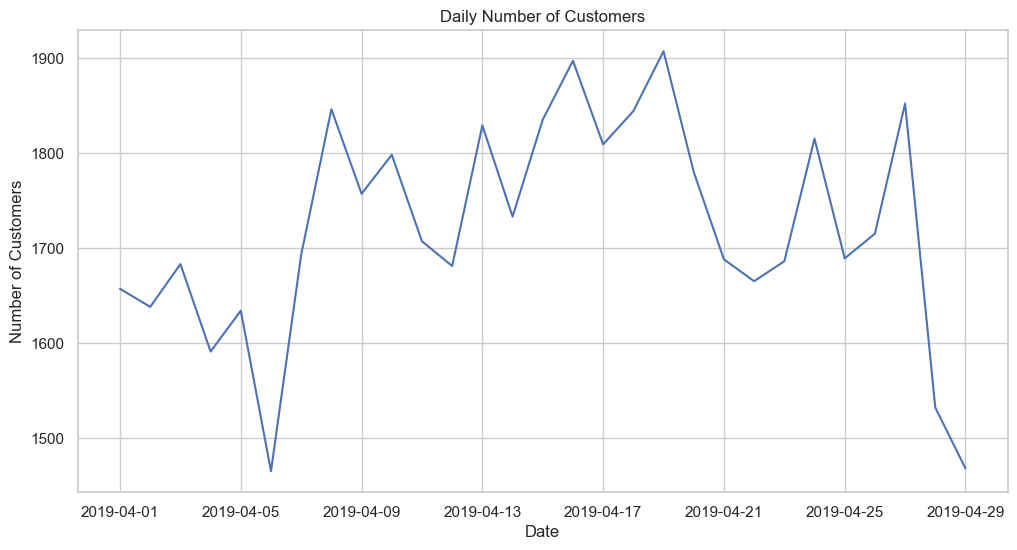

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



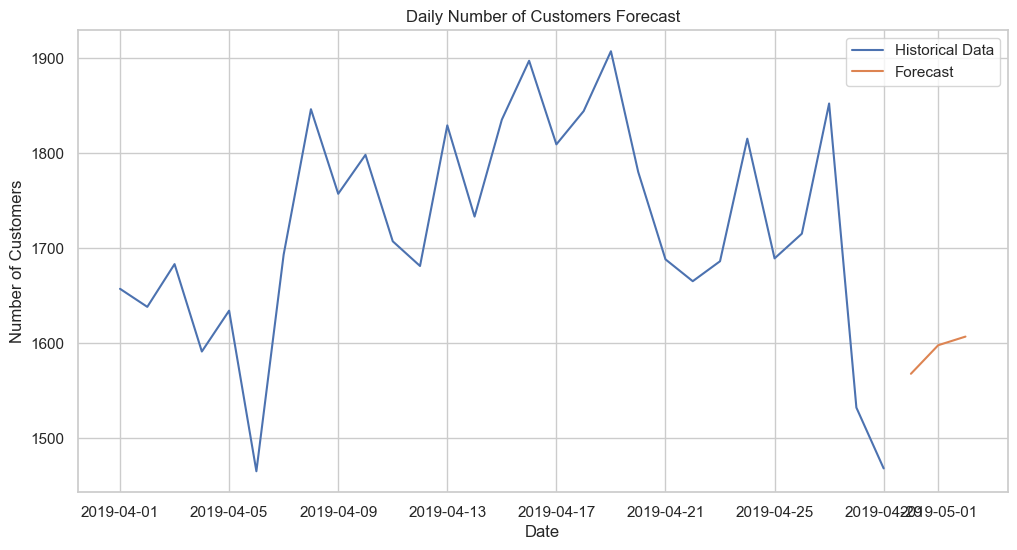

2019-04-30    1567.583875
2019-05-01    1597.636879
2019-05-02    1606.706450
Freq: D, Name: predicted_mean, dtype: float64


In [104]:
from statsmodels.tsa.arima.model import ARIMA

# Extract relevant columns for time series forecasting
time_series_data = product_df[['transaction_date', 'ID']]

# Convert 'transaction_date' to datetime format
time_series_data['transaction_date'] = pd.to_datetime(time_series_data['transaction_date'])

# Group by 'transaction_date' and count the number of customers per day
daily_customers = time_series_data.groupby('transaction_date')['ID'].count().reset_index()

# Set 'transaction_date' as the index for time series analysis
daily_customers = daily_customers.set_index('transaction_date')

# Plot the daily number of customers
plt.figure(figsize=(12, 6))
plt.plot(daily_customers)
plt.title('Daily Number of Customers')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.show()

# Fit an ARIMA model
model = ARIMA(daily_customers, order=(1, 1, 1)) 
fit_model = model.fit()

# Forecast the next 3 days
forecast_steps = 3
forecast = fit_model.get_forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_customers, label='Historical Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.title('Daily Number of Customers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

# Display the forecast values for the next 3 days
print(forecast.predicted_mean.tail(forecast_steps))

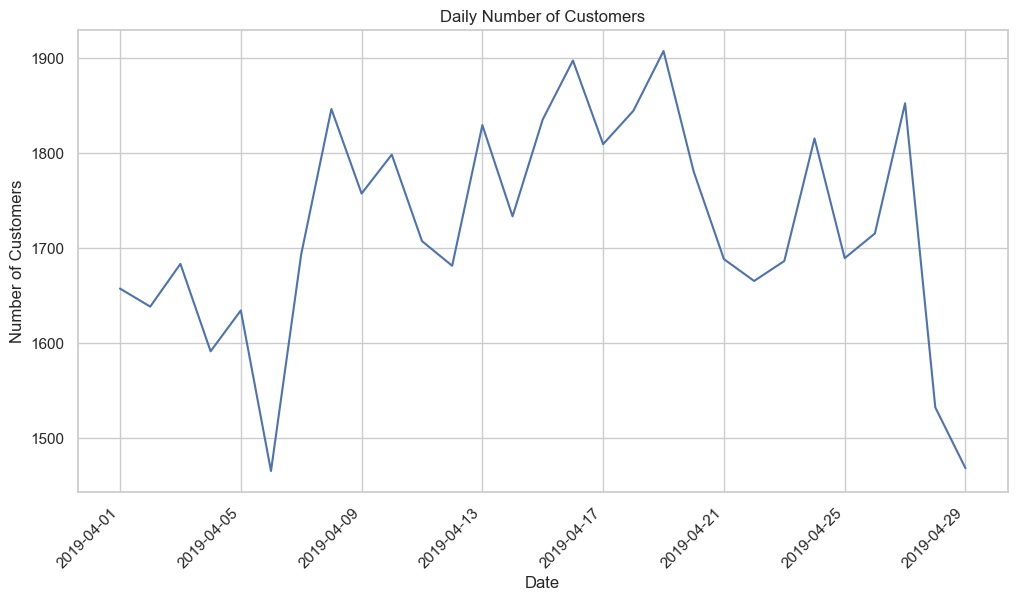

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



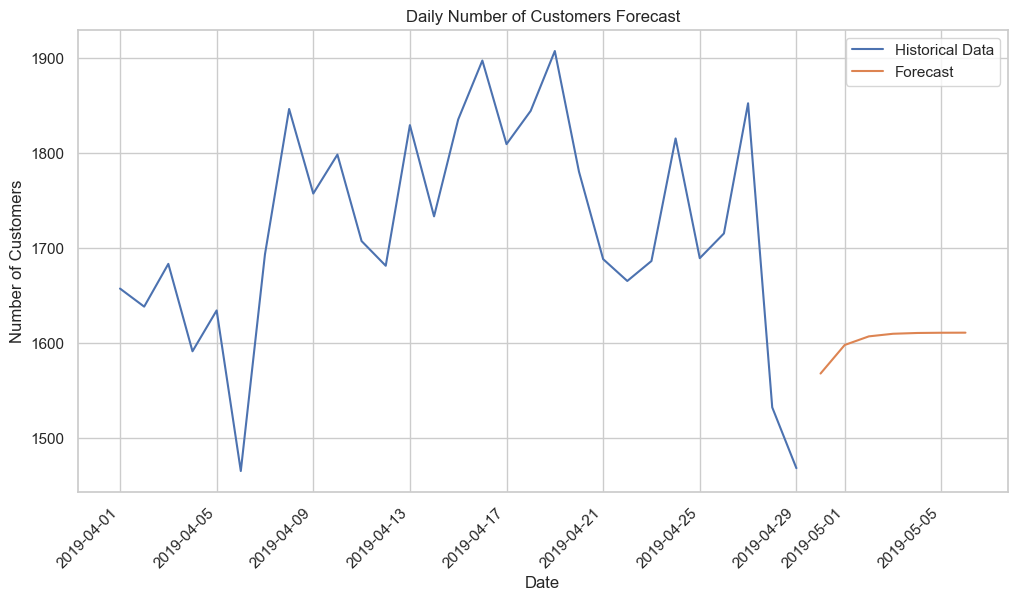

2019-04-30    1567.583875
2019-05-01    1597.636879
2019-05-02    1606.706450
2019-05-03    1609.443518
2019-05-04    1610.269526
2019-05-05    1610.518804
2019-05-06    1610.594032
Freq: D, Name: predicted_mean, dtype: float64


In [105]:
from statsmodels.tsa.arima.model import ARIMA


# Extract relevant columns for time series forecasting
time_series_data = product_df[['transaction_date', 'customer_id']]

# Convert 'transaction_date' to datetime format
time_series_data['transaction_date'] = pd.to_datetime(time_series_data['transaction_date'])

# Group by 'transaction_date' and count the number of customers per day
daily_customers = time_series_data.groupby('transaction_date')['customer_id'].count().reset_index()

# Set 'transaction_date' as the index for time series analysis
daily_customers = daily_customers.set_index('transaction_date')

# Plot the daily number of customers
plt.figure(figsize=(12, 6))
plt.plot(daily_customers)
plt.title('Daily Number of Customers')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Fit an ARIMA model
model = ARIMA(daily_customers, order=(1, 1, 1)) 
fit_model = model.fit()

# Forecast the next 7 days
forecast_steps = 7
forecast = fit_model.get_forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_customers, label='Historical Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.title('Daily Number of Customers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the forecast values for the next 7 days
print(forecast.predicted_mean.tail(forecast_steps))

### b) second try

In [106]:
product_forecast_df.head()

transaction_date   ID
0       2019-04-01   76
1       2019-04-01  136
2       2019-04-01  210
3       2019-04-01  254
4       2019-04-01  280

In [107]:
count_per_date = product_forecast_df.groupby('transaction_date')['ID'].nunique().reset_index()
count_per_date.columns = ['transaction_date', 'ID_count']

# Display the DataFrame
print(count_per_date)

   transaction_date  ID_count
0        2019-04-01      1416
1        2019-04-02      1401
2        2019-04-03      1434
3        2019-04-04      1357
4        2019-04-05      1384
5        2019-04-06      1241
6        2019-04-07      1279
7        2019-04-08      1356
8        2019-04-09      1305
9        2019-04-10      1319
10       2019-04-11      1263
11       2019-04-12      1267
12       2019-04-13      1304
13       2019-04-14      1109
14       2019-04-15      1301
15       2019-04-16      1354
16       2019-04-17      1263
17       2019-04-18      1270
18       2019-04-19      1345
19       2019-04-20      1169
20       2019-04-21      1173
21       2019-04-22      1348
22       2019-04-23      1363
23       2019-04-24      1457
24       2019-04-25      1370
25       2019-04-26      1388
26       2019-04-27      1433
27       2019-04-28      1286
28       2019-04-29      1188


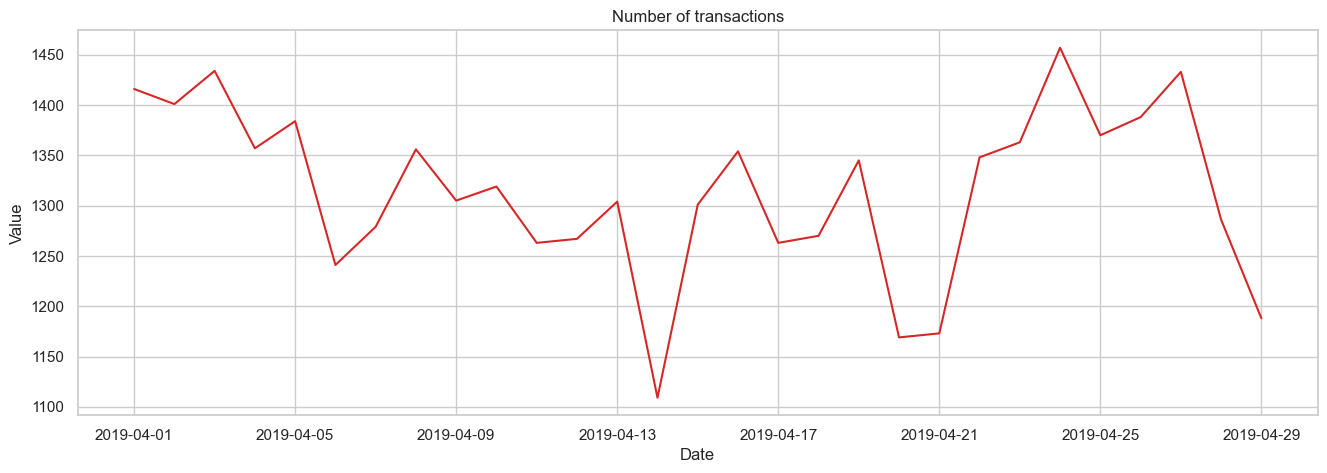

In [108]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

count_per_date = product_forecast_df.groupby('transaction_date')['ID'].nunique()
plot_df(time_series_data, x=count_per_date.index, y=count_per_date.values, title='Number of transactions')

In [109]:
count_for_date = product_forecast_df[product_forecast_df['transaction_date'] == '2019-04-17']['ID'].nunique()

print(f"Count of unique customer_id for the date '2019-04-17': {count_for_date}")

Count of unique customer_id for the date '2019-04-17': 1263


In [110]:
product_forecast_df = product_forecast_df.groupby('transaction_date')['ID'].nunique().reset_index()
product_forecast_df.columns = ['transaction_date', 'ID_count']
product_forecast_df.head()

transaction_date  ID_count
0       2019-04-01      1416
1       2019-04-02      1401
2       2019-04-03      1434
3       2019-04-04      1357
4       2019-04-05      1384

In [111]:
product_forecast_df['transaction_date'] = pd.to_datetime(product_forecast_df['transaction_date'])
product_forecast_df.set_index('transaction_date', inplace=True)
product_forecast_df.head()

ID_count
transaction_date          
2019-04-01            1416
2019-04-02            1401
2019-04-03            1434
2019-04-04            1357
2019-04-05            1384

In [112]:
product_forecast_df =product_forecast_df.asfreq("D")
product_forecast_df.index

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-13', '2019-04-14', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29'],
              dtype='datetime64[ns]', name='transaction_date', freq='D')

In [113]:
product_forecast_df

ID_count
transaction_date          
2019-04-01            1416
2019-04-02            1401
2019-04-03            1434
2019-04-04            1357
2019-04-05            1384
2019-04-06            1241
2019-04-07            1279
2019-04-08            1356
2019-04-09            1305
2019-04-10            1319
2019-04-11            1263
2019-04-12            1267
2019-04-13            1304
2019-04-14            1109
2019-04-15            1301
2019-04-16            1354
2019-04-17            1263
2019-04-18            1270
2019-04-19            1345
2019-04-20            1169
2019-04-21            1173
2019-04-22            1348
2019-04-23            1363
2019-04-24            1457
2019-04-25            1370
2019-04-26            1388
2019-04-27            1433
2019-04-28            1286
2019-04-29            1188

### Stationarity test

#### H0: data is non-stationary

In [174]:
from statsmodels.tsa.stattools import adfuller
df = product_forecast_df

# ADF Test
result = adfuller(df.ID_count, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.3929473305424254
p-value: 0.011201659124338853
Critial Values:
   1%, -3.6889256286443146
Critial Values:
   5%, -2.9719894897959187
Critial Values:
   10%, -2.6252957653061224


####  the ADF Statistic is -3.41, which is more negative than the critical values at 1%, 5%, and 10%. Additionally, the p-value is less than 0.05. Therefore, would reject the null hypothesis, indicating that the time series is likely stationary.

<AxesSubplot:xlabel='transaction_date'>

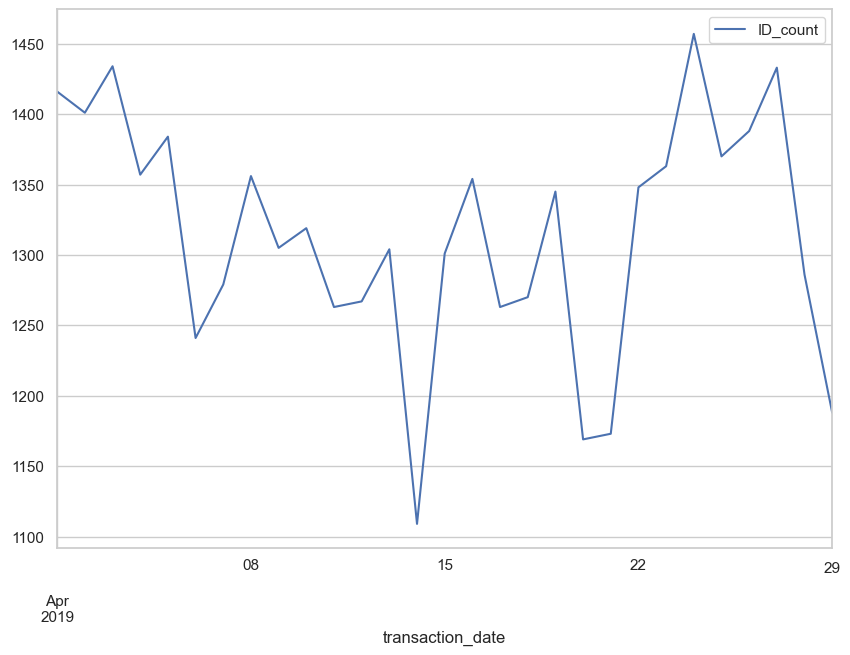

In [115]:
#Visualisation
product_forecast_df["ID_count"].plot(figsize = (10, 7), legend = True)

### Decomposition

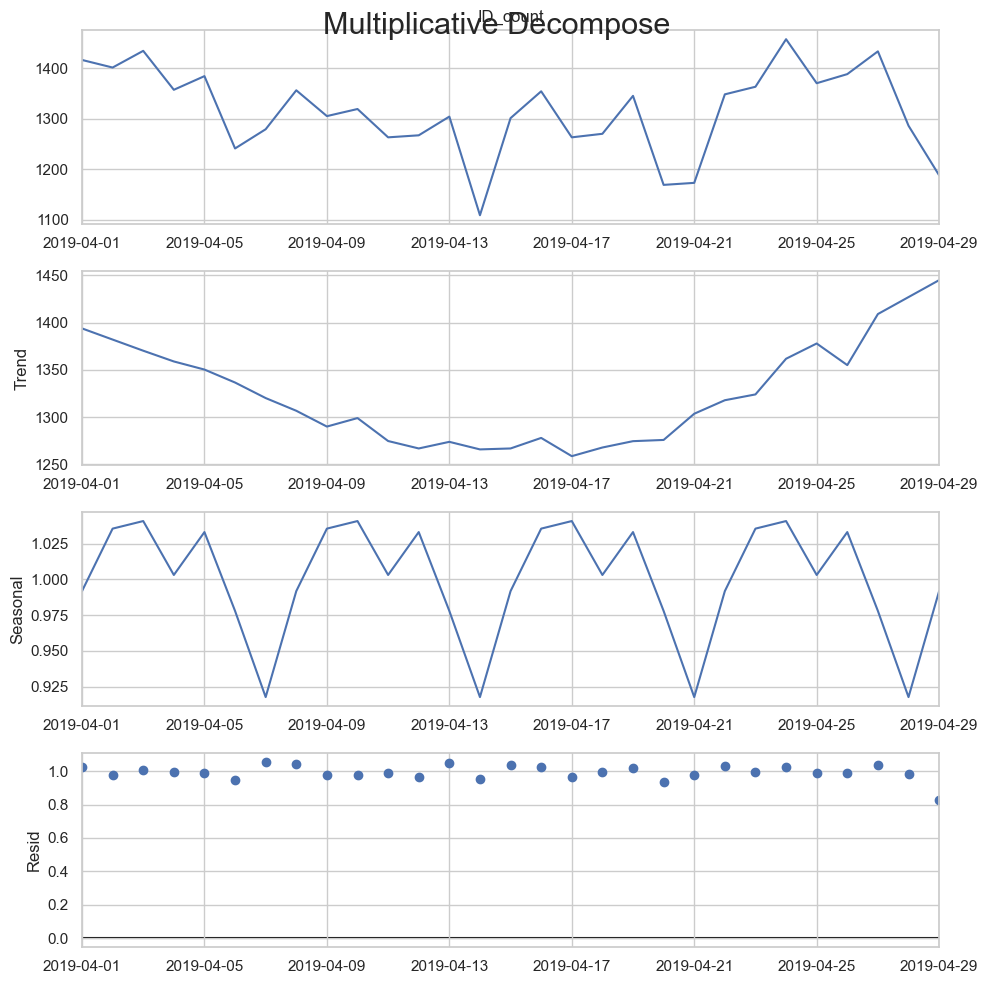

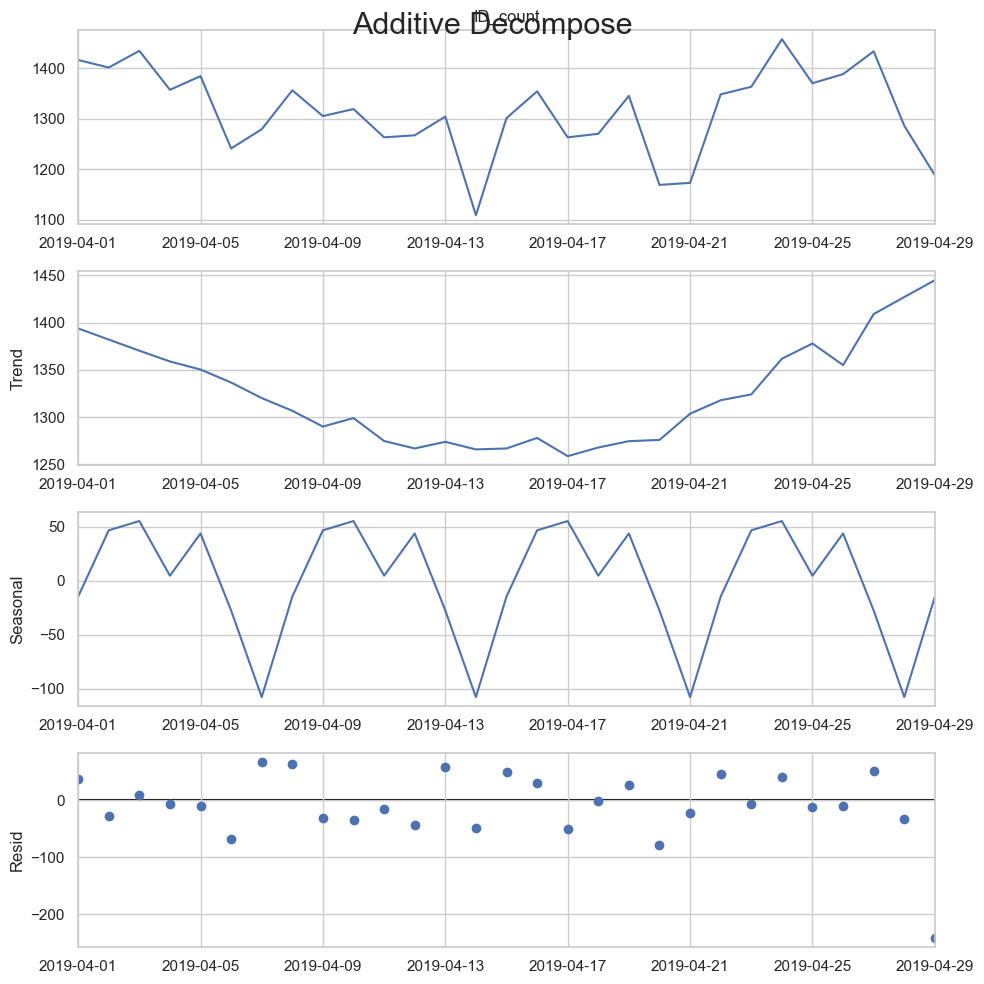

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(product_forecast_df['ID_count'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(product_forecast_df['ID_count'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [118]:
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

seas        trend      resid  actual_values
transaction_date                                                  
2019-04-01       -14.775510  1393.795918  36.979592         1416.0
2019-04-02        46.686224  1382.010204 -27.696429         1401.0
2019-04-03        55.275510  1370.224490   8.500000         1434.0
2019-04-04         4.617347  1358.857143  -6.474490         1357.0
2019-04-05        43.760204  1350.285714 -10.045918         1384.0

### Additive Decompose 

- Residiuals: <br>
Represents the random variability or noise in the data that is not accounted for by the trend and seasonality.
In this decompose residuals exhibit no patterns and are centered around zero.

## Estimating the forecastability of a time series

In [119]:
# Create a copy of product_forecast_df
df_for_entropy = product_forecast_df.copy()

# Reshape the time series data into a 1D array
time_series_data = df_for_entropy['ID_count'].values

# Define the ApEn function
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

# Apply ApEn to the copied dataset with specified parameters
approx_entropy = ApEn(time_series_data, m=2, r=0.2*np.std(time_series_data))
print(approx_entropy)

0.16167440741768013


# Forecasting the number of customers in next 7 days

### Training test sets

In [176]:
product_forecast_df.head()

ID_count
transaction_date          
2019-04-01            1416
2019-04-02            1401
2019-04-03            1434
2019-04-04            1357
2019-04-05            1384

In [139]:
test_days = 7
training_set = product_forecast_df.iloc[:-test_days, :]
test_set = product_forecast_df.iloc[-test_days:, :]

In [140]:
training_set.tail(2)

ID_count
transaction_date          
2019-04-21            1173
2019-04-22            1348

In [141]:
test_set.tail(2)

ID_count
transaction_date          
2019-04-28            1286
2019-04-29            1188

In [142]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE'])

## 1. Exponential Smoothing

In [149]:
#Importing special library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [150]:
model = ExponentialSmoothing(endog = training_set.ID_count,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 7).fit()

In [151]:
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")
predictions_hw.head()

2019-04-23    1275.312546
2019-04-24    1262.678968
2019-04-25    1222.320903
2019-04-26    1255.123857
2019-04-27    1167.022429
Freq: D, Name: HW, dtype: float64

<AxesSubplot:xlabel='transaction_date'>

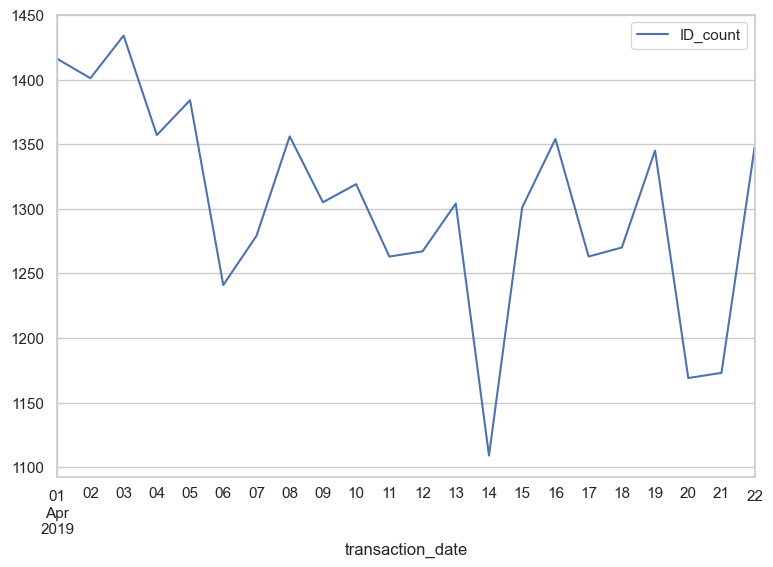

In [152]:
#Visualisation of the model
training_set['ID_count'].plot(figsize = (9,6), legend = True)

<AxesSubplot:xlabel='transaction_date'>

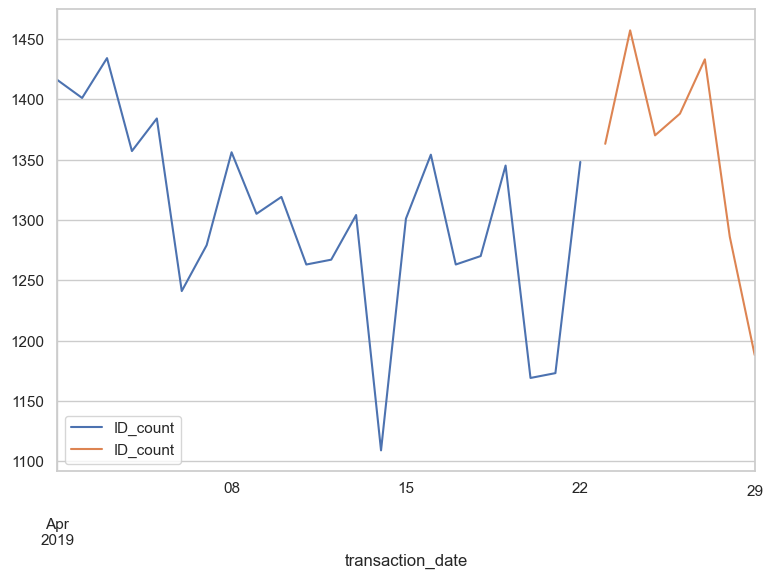

In [153]:
training_set['ID_count'].plot(figsize = (9,6), legend = True)
test_set['ID_count'].plot(legend = True)

<AxesSubplot:xlabel='transaction_date'>

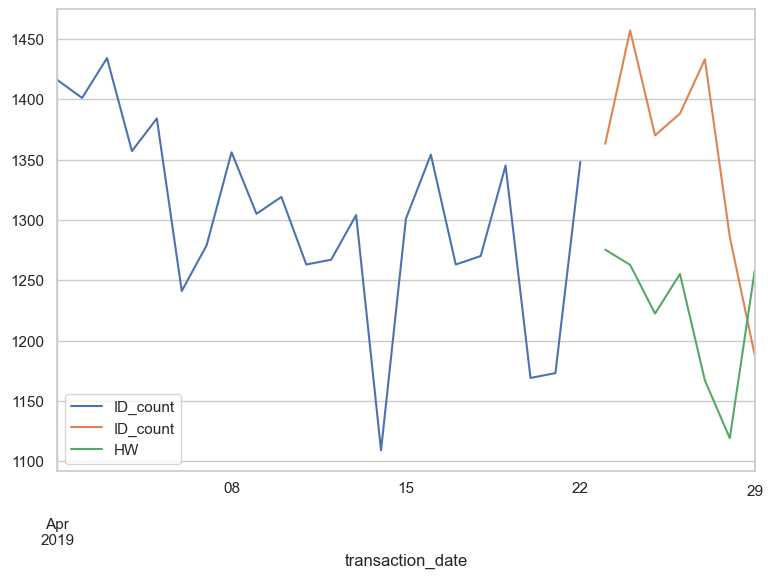

In [154]:
# Visualisation of the model
training_set['ID_count'].plot(figsize = (9,6), legend = True)
test_set['ID_count'].plot(legend = True)
predictions_hw.plot(legend = True)

In [155]:
# analyse MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(round(mean_absolute_error(test_set['ID_count'], predictions_hw),0))
print(round(np.sqrt(mean_squared_error(test_set['ID_count'], predictions_hw)), 0))


152.0
164.0


In [156]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['ID_count'], predictions_hw)

11.075969346994748

### Additive

In [157]:
model = ExponentialSmoothing(endog = training_set.ID_count,
                             trend = 'add',
                             seasonal = 'add',
                             seasonal_periods = 7).fit()

In [158]:
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")
predictions_hw.head()

2019-04-23    1304.346710
2019-04-24    1298.321330
2019-04-25    1264.197195
2019-04-26    1306.911974
2019-04-27    1219.447961
Freq: D, Name: HW, dtype: float64

<AxesSubplot:xlabel='transaction_date'>

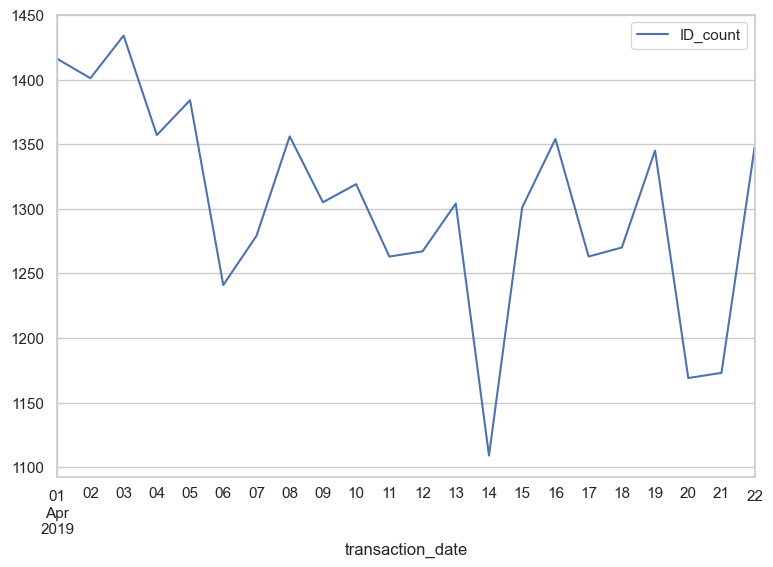

In [159]:
#Visualisation of the model
training_set['ID_count'].plot(figsize = (9,6), legend = True)

<AxesSubplot:xlabel='transaction_date'>

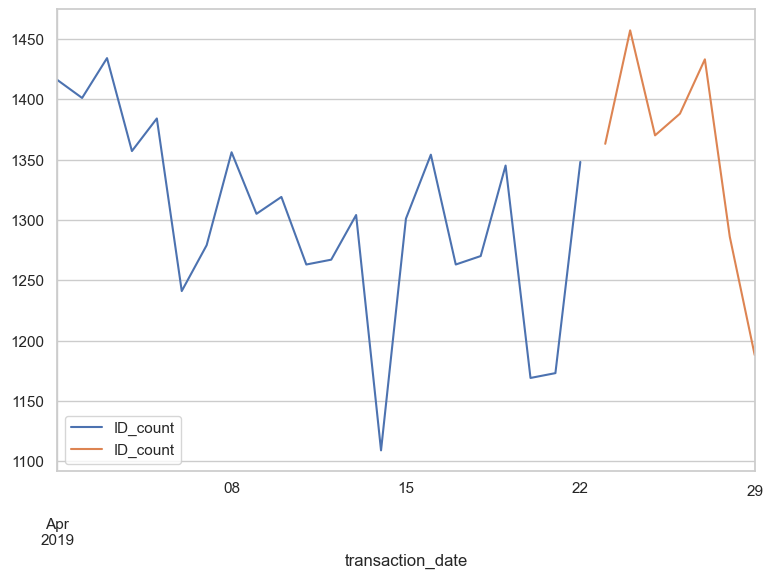

In [160]:
training_set['ID_count'].plot(figsize = (9,6), legend = True)
test_set['ID_count'].plot(legend = True)

<AxesSubplot:xlabel='transaction_date'>

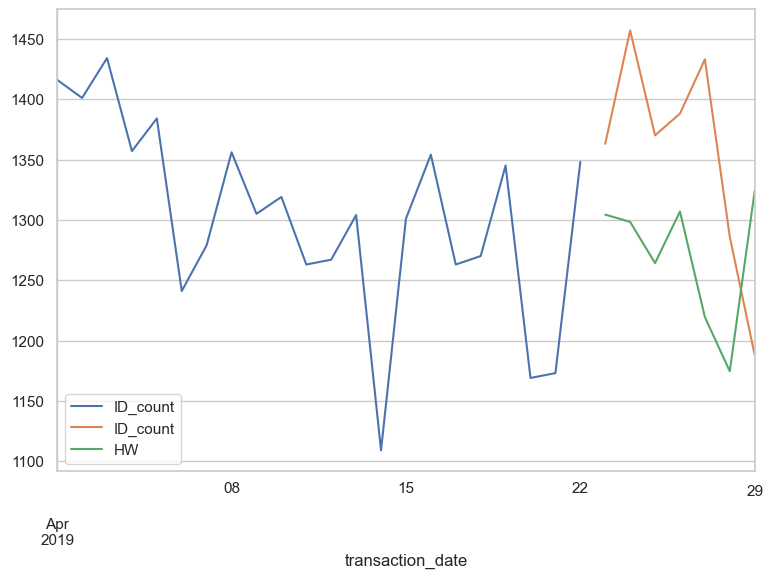

In [161]:
#Visualisation of the model
training_set['ID_count'].plot(figsize = (9,6), legend = True)
test_set['ID_count'].plot(legend = True)
predictions_hw.plot(legend = True)

In [162]:
# analyse MAE and RMSE

print('MAE_Ex', round(mean_absolute_error(test_set['ID_count'], predictions_hw),0))
print('RMSE_Ex',round(np.sqrt(mean_squared_error(test_set['ID_count'], predictions_hw)), 0))

MAE_Ex 124.0
RMSE_Ex 133.0


In [163]:
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
Mape_Ex = MAPE(test_set['ID_count'], predictions_hw)
print(Mape_Ex)

9.111234644936907


## TBATS  - better if there is longer time series

In [164]:
from tbats import TBATS

#TBATS model
model = TBATS(use_trend = True, seasonal_periods = [7, 365.5])
model = model.fit(training_set['ID_count'])

In [165]:
product_forecast_df.head()

ID_count
transaction_date          
2019-04-01            1416
2019-04-02            1401
2019-04-03            1434
2019-04-04            1357
2019-04-05            1384

In [166]:
# perform predictions
predictions_tbats = model.forecast(steps = len(test_set))
predictions_tbats

array([1349.75790957, 1358.55651683, 1341.91357369, 1404.48825363,
       1339.60584016, 1319.59106222, 1494.9697162 ])

In [167]:
# perform predictions and use Pandas to give structure to the data
predictions_tbats = pd.Series(model.forecast(steps = len(test_set)))
predictions_tbats.head()

0    1349.757910
1    1358.556517
2    1341.913574
3    1404.488254
4    1339.605840
dtype: float64

In [168]:
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

transaction_date
2019-04-23    1349.757910
2019-04-24    1358.556517
2019-04-25    1341.913574
2019-04-26    1404.488254
2019-04-27    1339.605840
Freq: D, Name: TBATS, dtype: float64

<AxesSubplot:xlabel='transaction_date'>

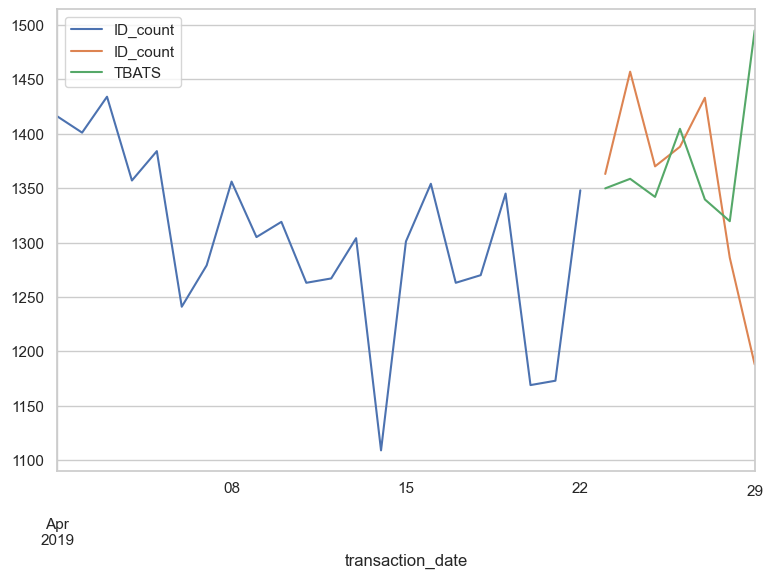

In [169]:
#Visualisation of the model
training_set['ID_count'].plot(figsize = (9,6), legend = True)
test_set['ID_count'].plot(legend = True)
predictions_tbats.plot(legend = True)

In [170]:
# use again MAE and RMSE

print('MAE_tbats', round(mean_absolute_error(test_set['ID_count'], predictions_tbats),0))
print('RMSE_tbats', round(np.sqrt(mean_squared_error(test_set['ID_count'], predictions_tbats)), 0))

MAE_tbats 84.0
RMSE_tbats 128.0


In [171]:
MAPE_tbats = MAPE(test_set['ID_count'], predictions_tbats)
print(MAPE_tbats)

6.562113297673782


## SARIMA

In [175]:
from pmdarima import auto_arima

In [178]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

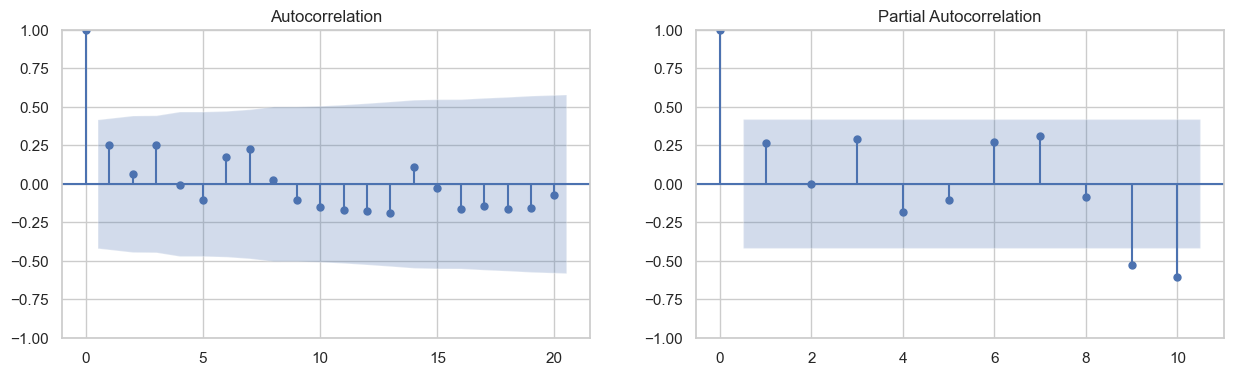

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(training_set['ID_count'], lags=20, ax=axes[0])
plot_pacf(training_set['ID_count'], lags=10, ax=axes[1])
plt.show()

# <br>
q = 1    check 7 <br>
p = 1 / 9
s = 10
(p, d, q)

d = 1
(P, D, Q, S)

In [236]:
order = (1, 1, 1)          
seasonal_order = (1, 1, 1, 10) 

# Create and fit the SARIMA model
sarima_model = SARIMAX(training_set['ID_count'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Forecast for the next 7 days
sarima_forecast = sarima_result.get_forecast(steps=7)

# Get the predicted values and confidence intervals
sarima_predictions = sarima_forecast.predicted_mean
confidence_intervals = sarima_forecast.conf_int()

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



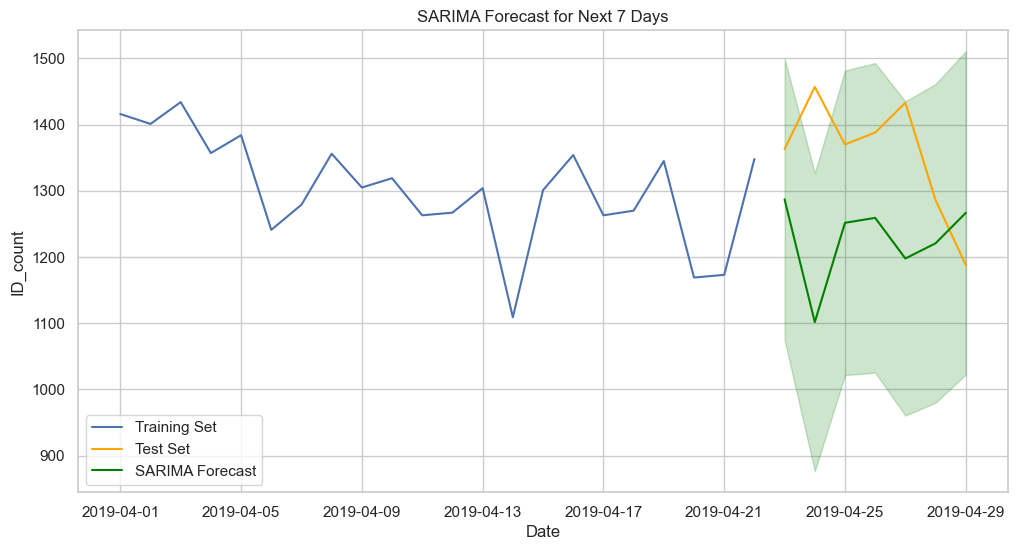

In [237]:

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(training_set.index, training_set['ID_count'], label='Training Set')
plt.plot(test_set.index, test_set['ID_count'], label='Test Set', color='orange')
plt.plot(sarima_predictions.index, sarima_predictions, label='SARIMA Forecast', color='green')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='green', alpha=0.2)
plt.title('SARIMA Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('ID_count')
plt.legend()
plt.show()

In [238]:

# Calculate metrics for SARIMA
mae_sarima = round(mean_absolute_error(test_set['ID_count'], sarima_predictions), 0)
rmse_sarima = round(np.sqrt(mean_squared_error(test_set['ID_count'], sarima_predictions)), 0)
mape_sarima = MAPE(test_set['ID_count'], sarima_predictions)

In [239]:
print(mae_sarima)
print(rmse_sarima)
print(mape_sarima)

151.0
181.0
10.856511473976314


In [195]:
print(mae_sarima)
print(rmse_sarima)
print(mape_sarima)

151.0
181.0
10.856511473976314


# Dashboard - current stock level

In [387]:
product_df = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\pastry inventory.csv")
product_df.head()

transaction_date  product_id  start_of_day  quantity_sold  waste % waste  \
0       01/04/2019          69            18              8     10     56%   
1       01/04/2019          70            18             12      6     33%   
2       01/04/2019          71            18              8     10     56%   
3       01/04/2019          72            48              9     39     81%   
4       01/04/2019          73            18              9      9     50%   

   Lead_time  
0          3  
1          3  
2          3  
3          3  
4          3

In [388]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  135 non-null    object
 1   product_id        135 non-null    int64 
 2   start_of_day      135 non-null    int64 
 3   quantity_sold     135 non-null    int64 
 4   waste             135 non-null    int64 
 5   % waste           135 non-null    object
 6   Lead_time         135 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 7.5+ KB
